## Загрузка библиотек и файлов. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
try:
    data = pd.read_csv('D:\\Катя\\Яндекс практикум\\проект 3\\real_estate_data.csv', sep='\t')
except:
    print('Error')

**Загружены необходимые для работы библиотеки, а также данные сервиса Яндекс Недвижимость (архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах).**

## Краткий обзор данных.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


**Данные представлены в объёме 23699 строк и 22 столбцов, а именно:**

- ***total_images - количество фотографий квартиры в объявлении,***

- ***last_price -  цена на момент снятия с публикации,***

- ***total_area - общая площадь квартиры в квадратных метрах,***

- ***first_day_exposition - дата публикации,***

- ***rooms - число комнат,***

- ***ceiling_height -  высота потолков в метрах (в столбце имеются пропущенные значения),***

- ***floors_total - количество этажей в доме (в столбце имеются пропущенные значения),***

- ***living_area - жилая площадь в квадратных метрах (в столбце имеются пропущенные значения),***

- ***floor - этаж,***

- ***is_apartment - является ли жильё апартаментами (в столбце имеются пропущенные значения),***

- ***studio - является ли жильё квартирой-студией,***

- ***open_plan - имеется ли свободная планировка,***

- ***kitchen_area - площадь кухни в квадратных метрах (в столбце имеются пропущенные значения),***

- ***balcony - число балконов (в столбце имеются пропущенные значения),***

- ***locality_name - название населённого пункта (в столбце имеются пропущенные значения),***

- ***airports_nearest - расстояние до ближайшего аэропорта в метрах (в столбце имеются пропущенные значения),***

- ***cityCenters_nearest - расстояние до центра города в метрах (в столбце имеются пропущенные значения),***

- ***parks_around3000 - число парков в радиусе 3 км (в столбце имеются пропущенные значения),***

- ***parks_nearest - расстояние до ближайшего парка в метрах (в столбце имеются пропущенные значения),***

- ***ponds_around3000 -  число водоёмов в радиусе 3 км (в столбце имеются пропущенные значения),***

- ***ponds_nearest - расстояние до ближайшего водоёма в метрах (в столбце имеются пропущенные значения),***

- ***days_exposition - количество дней размещения объявления от публикации до снятия (в столбце имеются пропущенные значения).***

**Таким образом, в данных обнаружены пропуски - следует изучить их и при необходимости обработать. Также следует осуществить проверку данных на наличие явных и неявных дубликатов, изменить типы данных для некоторых показателей.**

## Предобработка данных.

**Изучим пропущенные значения в данных.**

In [5]:
# пропуски в количественном выражении
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# пропуски в процентном выражении
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Минимальное количество пропусков в столбце составляет 86 шт., максимальное 20924 шт. В процентном отношении пропуски составляют от менее 1% от объёма данных до 88%.**

### Пропущенные значения в столбце ceiling_height.

In [7]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [8]:
data['ceiling_height'].min(), data['ceiling_height'].max()

(1.0, 100.0)

**В столбце ceiling_height (высота потолков) имеется 9195 пропущенных значений - это 39% от общего количества объектов недвижимости. Минимально указанная в данных высота потолков - 1 метр, максимальная - 100 метров.**

**Сразу стоит указать, что в сети Интернет можно найти сведения о том, что по строительным нормам на сегодняшний день высота потолка не может быть ниже 2,5 метров. Как правило, в новостройках высота потолка находится в пределах 2,5-2,7 метров. Для элитного жилья высота потолков может превышать 3 метра. Также стоит упоминуть о двухуровневых квартирах, в которых минимальную высоту от пола до потолка можно посчитать следующим образом: минимальная высота жилого помещения (от 2,5 метров) + минимальная высота антресоли (от 2,1 метра) + толщина самой конструкции антресоли (в среднем 0,2 метра). Т.о., минимальная высота двухуровневой квартиры должна составлять ~4,8 метра.**

**Исходя из этого, определим общепринятые для нашей страны минимальные и максимальные значения высоты потолков.**
    
***За минимальное значение возьмём 2,3 метра*** **(сделаем небольшой "запас" ниже 2,5 метров руководствуясь тем, что высота потолков во вторичном жилье, построенном во времена СССР, очевидно, регламентировалась другими СНИПами и минимальная высота потолков на то время могла быть ниже 2,5 метров).**

***За максимальное значение возьмём 5 метров для двухуровнего жилья*** **(тем более, исследование проводится для г. Санкт-Петербурга, и предполагаем, что такое жильё также имеется в данных с высокой долей вероятности).**


**Кроме того, при изучении уникальных значений выявлены данные, не соответствующие действительности:**

- ***слишком высокие потолки, например, 100 метров, 26 метров, 24 метра, 22.6 метра, 10.3 метра и т.п.***
    
**Можно предположить, что в некоторых значениях пользователем был ошибочно указан разрядный разделитель (т.е. 22,6 метра скорее всего означает 2,26 метра и т.п.), а некоторые данные просто указаны недостоверно (например, высота потолков 10 или 100 метров).**

- ***слишком низкие потолки менее 2,3 метра, например, 1 метр или 1,2 метра.***

**Сначала откорректируем данные по высоте потолков, которые мы посчитали ошибочно заполненными из-за разрядного разделителя - т.е. потолки с высотой более 20 метров просто разделим на 10:**

In [9]:
data.loc[data['ceiling_height'] > 20.00, 'ceiling_height'] = data['ceiling_height']/10

**Данные, выходящие за пределы минимального и максимального значения, предлагаем занулить. Далее, посчитать медианное значение высоты потолков, и заполнить этим значением занулённые данные, а также пропуски. Считаем целесообразным пока что не удалять данные, выходящие за пределы минимального и максимального значения, т.к. вероятно, при заполнении этих данных пользователь ошибся, и данные объекты недвижимости могут быть в дальнейшем полезны для исследования. В любом случае, количество таких данных составляет всего 32 объекта, они не смогут исказить результаты исследования.**

In [10]:
# количество объектов, выходящих за рамки принятой для исследования минимальной высоты потолков (2,3 метра)
len(data.query('ceiling_height < 2.30'))

17

In [11]:
# количество объектов, выходящих за рамки принятой для исследования максимальной высоты потолков (5 метров)
len(data.query('ceiling_height > 5.00'))

15

In [12]:
# зануляем пропуски, а также высоту потолков для 32 объектов недвижимости, которые выходят за рамки минимального и 
# максимального значений высоты потолков

data['ceiling_height'] = data['ceiling_height'].fillna(0.00)
data.loc[data['ceiling_height'] < 2.30, 'ceiling_height'] = 0.00
data.loc[data['ceiling_height'] > 5.00, 'ceiling_height'] = 0.00

In [13]:
data['ceiling_height'].median()

2.5

**Медианное значение высоты потолков составило 2,5 метра, что полностью соответствует СНИПам. Считаем обоснованным заполнить пропуски (39% от данных) медианным значением.**

In [14]:
# заполнение пропусков медианным значением высоты потолка
data.loc[data['ceiling_height'] == 0.00, 'ceiling_height'] = data['ceiling_height'].median()

**Пропуски в столбце ceiling_height обработаны (заполнены медианным значением высоты потолков). Кроме того, удалены выбросы в данных, не соответствующие действительности (слишком высокие и слишком низкие потолки).**

### Пропущенные значения в столбце floors_total.

In [15]:
data['floors_total'].isna().sum()

86

In [16]:
data['floors_total'].value_counts()

5.00     5788
9.00     3761
16.00    1376
12.00    1362
4.00     1200
10.00    1174
25.00    1075
6.00      914
17.00     833
3.00      668
7.00      592
14.00     553
18.00     505
24.00     469
8.00      390
2.00      383
15.00     365
23.00     352
19.00     339
22.00     286
20.00     271
13.00     229
11.00     203
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
36.00       3
37.00       1
34.00       1
33.00       1
60.00       1
29.00       1
52.00       1
Name: floors_total, dtype: int64

**В столбце floors_total (количество этажей в доме) пропущено всего лишь 86 значений, что составляет 0,3% от всех объектов недвижимости. Данное количество пропусков не окажет на исследование какого-либо существенного влияния (в плане искажения результатов), поэтому предлагается удалить данные строки. В случае заполнения пропусков медианным значением, для некоторых объектов недвижимости возникает ситуация, что этаж, на котором расположена квартира, оказывается выше общего количества этажей в доме. Поэтому удаление пропусков предпочтительнее.** 

In [17]:
len(data)

23699

In [18]:
data = data.dropna(subset=['floors_total'])

In [19]:
len(data)

23613

**Минимальное количество этажей в доме 1, максимальное 60 - данные, в целом, соответсвует действительности. В Санкт-Петербурге имеется высотное строительство, поэтому такое количество этажей как 52 или 60 не стоит считать недостоверными данными. Однако, скорее всего, жильё, расположенное в домах с количеством этажей более 40, относится к очень элитному жилью. И цена на данное жильё будет существенно выше среднерыночной цены, поэтому предлагается отсечь данные значения (этажи выше 40) - в кол-ве 2-ух объектов недвижимости.**
    
**Минимальное количество этажей - 1, скорее всего имелся ввиду этаж, на котором расположена квартира, либо продаётся частный одноэтажный дом, а не квартира. Для нашей страны не типичны одноэтажные многоквартирные дома. Предлагаем удалить данные объекты из датафрейма, т.к. их всего 25 ед., что не исказит результаты исследования.**
    
**Кроме того, следует преобразовать тип данных столбца floors_total с float64 на int64 (т.к. количество этажей - это целое, а  не дробное число):**

In [20]:
data['floors_total'] = data['floors_total'].astype(int)

In [21]:
len(data.loc[(data['floors_total'] >= 40)])

2

In [22]:
len(data.loc[(data['floors_total'] <= 1)])

25

In [23]:
# удаление объектов с количеством этажей выше 40
data = data.loc[(data['floors_total'] <= 40)]

In [24]:
# удаление объектов с количеством этажей ниже 1
data = data.loc[(data['floors_total'] > 1)]

**Пропуски в столбце floors_total обработаны (удалены). Кроме того, обработаны выбросы (удалены объекты с количеством этажей больше 40 и объекты, которые возможно являются частными домами, а не квартирами).**

### Пропущенные значения в столбце living_area.

In [25]:
sorted(data['living_area'].unique())

[2.0,
 3.0,
 9.0,
 10.0,
 10.6,
 12.3,
 12.7,
 13.0,
 14.0,
 14.4,
 14.47,
 14.6,
 14.7,
 14.73,
 15.0,
 15.2,
 15.35,
 15.36,
 15.4,
 15.43,
 15.9,
 16.0,
 16.1,
 16.3,
 16.5,
 16.9,
 17.0,
 17.1,
 17.2,
 17.4,
 17.5,
 17.7,
 17.8,
 17.9,
 18.0,
 18.1,
 18.2,
 18.6,
 18.7,
 19.0,
 19.2,
 19.3,
 19.4,
 20.3,
 20.5,
 20.8,
 21.4,
 23.0,
 24.75,
 25.0,
 25.4,
 25.41,
 26.0,
 26.1,
 26.4,
 26.5,
 26.7,
 27.0,
 27.7,
 28.0,
 28.3,
 28.4,
 28.7,
 28.73,
 28.8,
 28.9,
 29.0,
 29.1,
 29.5,
 29.6,
 29.7,
 29.8,
 30.0,
 30.04,
 30.3,
 30.9,
 31.0,
 31.1,
 31.48,
 32.0,
 32.5,
 32.7,
 33.0,
 33.6,
 33.7,
 34.1,
 34.2,
 34.3,
 34.4,
 35.0,
 36.6,
 36.7,
 37.0,
 37.1,
 37.7,
 38.1,
 38.5,
 38.7,
 38.8,
 39.0,
 39.7,
 39.8,
 40.4,
 40.59,
 41.0,
 41.5,
 42.0,
 42.2,
 42.4,
 42.7,
 42.8,
 43.0,
 43.1,
 43.2,
 43.4,
 43.6,
 43.78,
 44.1,
 44.9,
 45.7,
 46.5,
 47.0,
 47.4,
 50.0,
 50.9,
 51.0,
 nan,
 5.0,
 5.4,
 6.0,
 6.5,
 8.0,
 8.3,
 8.4,
 8.5,
 8.9,
 9.1,
 9.8,
 10.08,
 10.3,
 10.4,
 10.5,
 10.52,


In [26]:
data['living_area'].describe()

count   21721.00
mean       34.46
std        22.05
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

In [27]:
data['living_area'].isna().sum()

1865

**В столбце living_area (жилая площадь в кв.м.) пропущено 1865 значений, что составляет 8% от общего количества объектов недвижимости.**

**При изучении уникальных значений можно заметить данные, кажущиеся нереалистиными.**

**Например,** ***квартиры с очень маленькой жилой площадью 2 кв.м.-10 кв.м.*** **представляются сомнительными данными. Возможно, пользователь ошибся в жилой площади, но указал правильно общую площадь квартиры. Или например, не правильно поставил разрядный разделитель, и жилая площадь составляет не 2,00 кв.м, а 20,00 кв.м. Возможно, в данных указаны не только квартиры на продажу, но и комнаты в коммунальных квартирах - тогда становится понятен очень маленький метраж жилья.**

**Также вызывает вопрос** ***слишком высокие площади жилья.*** **Опять же, возможно, в каких-то данных пользователь не правильно указал разрядный разделитель, и под площадью 409,70 кв.м. имеется ввиду 40,97 кв.м. С другой стороны, данные включают в себя и элитное жильё - в таком случае жилая площадь 409,70 кв.м. представляется возможной.** 

**Далее приводим ссылку на статью о метраже в новостройках Санкт-Петербурга [с сайта Фонтанка.ру](https://www.fontanka.ru/2022/05/19/71342666/) от 19.05.2022г. В данной статье приводится интервью с представителями застройщиков Санкт-Петербурга, и говорится, в частности, о том, что на текущий момент времени минимальная площадь квартир-студий составляет 17 кв.м. С учётом этого, допускаем, что минимальная жилая площадь может составлять порядка 10 кв.м.** ***(с учётом того, что из общей площади мы вычитаем туалет/ванную комнату ~2,5-4 кв.м., а также при наличии балкон).*** 
    
**При изучении элитного жилья Санкт-Петербурга [на сайте циан](https://spb.cian.ru/kupit-kvartiru-elitnie-sankt-peterburg-zhdanovskaya-ulica-023867/) можно обнаружить 5-6 комнатные квартиры с метражом свыше 400-500 кв.м. Поэтому, большой размер жилой площади в данных является элитным жильём, а не ошибками в данных. Тем не менее, объекты недвижимости с такой площадью являются эксклюзивными, по своим характеристикам очень сильно отличающимся от рынка. Для исследования предлагаем ограничить максимальную жилую площадь 100 кв.м.**

In [28]:
data.query('living_area < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.00,21.40,2019-02-07T00:00:00,1,2.90,8,8.30,7,NaN,False,False,6.30,NaN,Санкт-Петербург,27089.00,5791.00,2.00,488.00,1.00,286.00,NaN
680,14,7200000.00,43.00,2017-10-31T00:00:00,1,2.50,8,9.00,2,NaN,False,False,23.00,NaN,Санкт-Петербург,23900.00,5232.00,1.00,2137.00,1.00,933.00,296.00
1326,8,8100000.00,52.00,2017-01-29T00:00:00,2,2.70,25,9.00,15,NaN,False,False,32.00,2.00,Санкт-Петербург,35555.00,15561.00,0.00,NaN,1.00,1180.00,337.00
2309,10,4200000.00,62.40,2017-06-15T00:00:00,2,2.60,9,8.40,6,NaN,False,False,41.00,2.00,посёлок Шушары,23662.00,29448.00,0.00,NaN,0.00,NaN,111.00
3242,7,4440000.00,41.00,2017-07-02T00:00:00,1,2.50,17,3.00,17,NaN,False,False,11.00,NaN,Санкт-Петербург,19272.00,13073.00,0.00,NaN,0.00,NaN,216.00
4100,17,5300000.00,34.80,2017-06-19T00:00:00,1,2.70,23,9.00,15,NaN,False,False,17.10,0.00,Санкт-Петербург,33626.00,13495.00,0.00,NaN,0.00,NaN,30.00
4542,12,3300000.00,18.00,2018-11-07T00:00:00,1,3.50,5,9.00,2,NaN,False,False,NaN,NaN,Санкт-Петербург,25157.00,4948.00,2.00,349.00,1.00,963.00,9.00
7312,8,3400000.00,27.00,2018-02-21T00:00:00,2,2.50,15,9.00,4,NaN,False,False,16.00,NaN,Санкт-Петербург,50246.00,16444.00,1.00,617.00,0.00,NaN,NaN
8325,9,4800000.00,52.00,2017-10-25T00:00:00,2,2.50,5,9.00,2,NaN,False,False,6.00,1.00,Санкт-Петербург,33358.00,13171.00,0.00,NaN,2.00,118.00,119.00
13915,20,6350000.00,52.00,2018-02-06T00:00:00,2,3.00,6,2.00,2,NaN,False,False,9.00,NaN,Санкт-Петербург,32453.00,6521.00,0.00,NaN,1.00,1012.00,91.00


In [29]:
len(data.query('living_area < 10'))

25

In [30]:
data.query('living_area > 100').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20256,5,13351000.00,102.70,2018-07-03T00:00:00,6,3.40,4,101.00,1,NaN,False,False,NaN,NaN,Санкт-Петербург,24477.00,5464.00,2.00,519.00,0.00,NaN,229.00
21593,16,11000000.00,131.30,2017-06-21T00:00:00,6,3.00,4,104.80,2,False,False,False,8.90,NaN,Санкт-Петербург,25275.00,3850.00,1.00,364.00,0.00,NaN,480.00
4626,1,39900000.00,132.00,2017-11-23T00:00:00,4,3.00,8,105.00,5,NaN,False,False,24.00,2.00,Санкт-Петербург,25049.00,4753.00,0.00,NaN,1.00,206.00,NaN
17350,18,25000000.00,134.00,2016-12-01T00:00:00,7,3.29,6,104.00,2,NaN,False,False,11.20,0.00,Санкт-Петербург,25257.00,6060.00,1.00,761.00,1.00,584.00,278.00
7336,20,25990000.00,138.10,2017-09-18T00:00:00,4,2.85,6,102.80,2,NaN,False,False,21.70,NaN,Санкт-Петербург,22821.00,3470.00,1.00,974.00,1.00,341.00,189.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,1,50000000.00,517.00,2017-10-14T00:00:00,7,2.50,4,332.00,3,NaN,False,False,22.00,NaN,Санкт-Петербург,22835.00,1847.00,2.00,477.00,2.00,540.00,NaN
5358,20,65000000.00,590.00,2019-02-14T00:00:00,15,3.50,6,409.00,3,NaN,False,False,100.00,NaN,Санкт-Петербург,24447.00,4666.00,1.00,767.00,0.00,NaN,14.00
15651,20,300000000.00,618.00,2017-12-18T00:00:00,7,3.40,7,258.00,5,NaN,False,False,70.00,NaN,Санкт-Петербург,32440.00,5297.00,0.00,NaN,2.00,198.00,111.00
12859,20,140000000.00,631.20,2019-04-09T00:00:00,7,3.90,4,322.30,4,NaN,False,False,19.50,1.00,Санкт-Петербург,25707.00,4972.00,0.00,NaN,2.00,210.00,NaN


In [31]:
len(data.query('living_area > 100'))

353

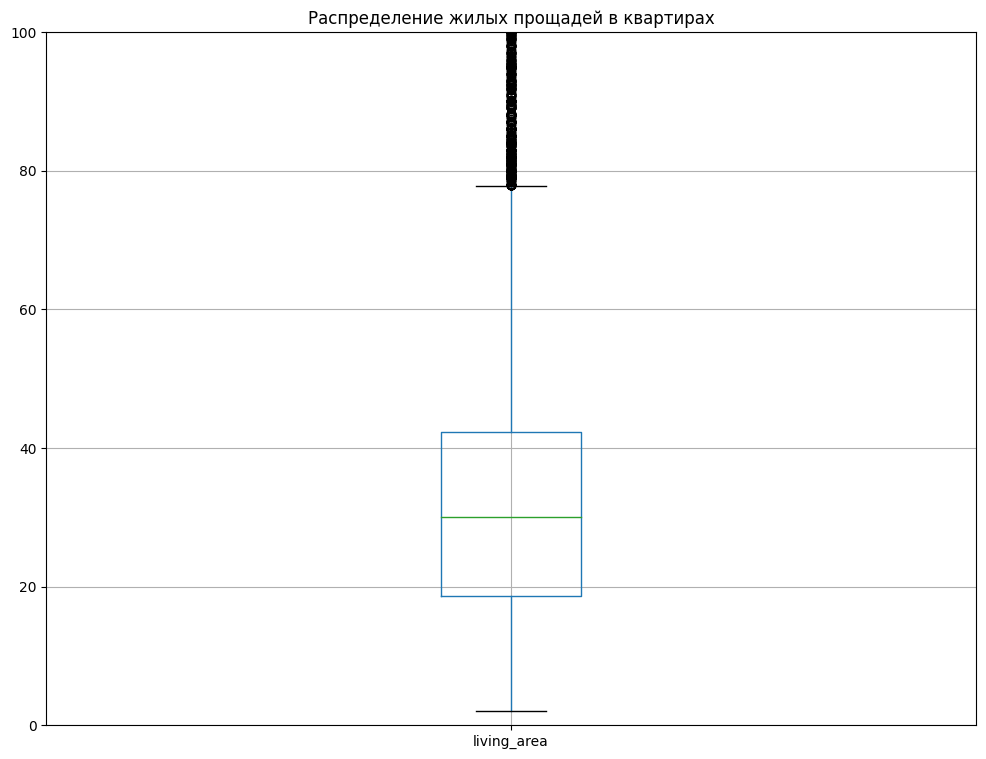

In [32]:
data.boxplot(column='living_area', figsize=(12,9))
plt.ylim(0, 100)
plt.title('Распределение жилых прощадей в квартирах')
plt.show()

**Срезы по столбцу living_area показали следующее:**
    
- **в объявлениях с объектами недвижимости с жилой площадью менее 10 кв.м. общая площадь жилья указана от 18 до 139 кв.м. Это указывает на ошибку пользователя при составлении объявления. Предлагаем удалить эти данные, т.к. таких объявлений всего 25 ед. - это не исказит результаты исследования.**

- **срезы по объектам недвижимости с жилой площадью свыше 100 кв.м. подтверждают тот факт, что в объявлениях нет ошибки, и размещено элитное жильё. Удалим эти значения из data, поскольку они являются эксклюзивными объектами для рынка недвижимости. Тем более, что график boxplot говорит о том, что нормальное распределение жилых площадей в квартирах составляет от 2 кв.м. до ~78 кв.м. - остальное выбросы. Но поскольку в исследовании рассматривается рынок недвижимости, то исходя из принципа разумности думаем, что возможно оставить предложенный нами фильтр. А именно: удалить данные с жилой площадью менее 10 кв.м. (всего 25 объектов) и оставить для анализа часть объектов с более дорогостоящей недвижимостью, ограничив при этом максимальную жилую площадь 100 кв.м. - поскольку рассматривается Санкт-Петербург и такая недвижимость точно представлена в объявлениях (кроме того, возможно эти данные могут оказаться полезны для анализа). Удаляемые выбросы среди объектов жилой площадью свыше 100 кв.м. составляют 353 ед., или 1,4% от объёма всех данных.**

**Жилая площадь не включает в себя кухню, балкон, ванную комнату и коридоры. Вычислим по медианным значениям примерную долю, которая приходится на жилую площадь. Площадь балкона примем примерно за 3 кв.м., площадь туалета и коридоров за 6 кв.м.:**

In [33]:
# расчёт примерной медианной доли жилой площади квартиры
(data['total_area'].median() - data['kitchen_area'].median() - (data['balcony'].median())*3.00 - \
 6.00) / data['total_area'].median() * 100

65.1923076923077

**Таким образом, пропуски заполним по формуле: общая площадь жилья * 0.6 (расчитанная выше примерная медианная доля жилой площади в квартире).**

**При заполнении пропусков медианным значением, расчитанным для всего столбца living_area, теоретически, может возникнуть ситуация (для малометражного жилья/студий), когда жилая площадь будет превышать саму площадь жилья.**

In [34]:
data['living_area'].median()

30.0

In [35]:
# заполнение пропусков по формуле, предложенной выше
data['living_area'] = data['living_area'].fillna(data['total_area']*0.6)

In [36]:
# удаление объектов недвижимости с жилой площадью выше 100 кв.м.
data = data.loc[(data['living_area'] <= 100.00)]

In [37]:
# удаление объектов недвижимости с жилой площадью меньше 10 кв.м.
data = data.loc[(data['living_area'] >= 10.00)]

**Пропуски в столбце living_area обработаны (жилая площадь рассчитана как 60% от общей площади, указанной для объектов недвижимости). Кроме того, обработаны выбросы (удалены объекты с жилой площадью менее 10 кв.м. и жилой площадью более 100 кв.м. в совокупном количестве 378 ед., что составляет 1,6% от объёма данных).**

### Пропущенные значения в столбце is_apartment.

In [38]:
data['is_apartment'].value_counts()

False    2685
True       48
Name: is_apartment, dtype: int64

In [39]:
data['is_apartment'].isna().sum()

20424

**В столбце is_apartament (апартаменты) имеется практически 90% пропусков в значениях. Данные заполнены всего на 12% по данному столбцу. Это свидетельствует о том, что для большинства покупателей и продавцов недвижимости данный критерий не является важным. Можно предположить, что пользователи не указывали в данном столбце данные, т.к. продают именно квартиры (не апартаменты). С другой стороны, для такого развитого города как Санкт-Петербург кажется странным наличие в объявлениях всего лишь 50 апартаментов, ведь данный тип жилья является востребованным. Предлагается оставить пропуски незаполненными, т.к. определить принадлежность жилья, указанного в объявлениях, к апартаментам не представляется возможным. Можно сделать вывод о том, что данные, предоставленные для столбца is_apartment являются плохого качества и не позволят сделать полноценный вывод о ликвидности, востребованности и иных характеристиках для апартаментов.**

### Пропущенные значения в столбце kitchen_area.

In [40]:
data['kitchen_area'].isna().sum()

2170

**В столбце kitchen_area (площадь кухни в кв.м.) имеются пропуски в 2170 ячейках, что составляет 11% от данных.**

In [41]:
sorted(data['kitchen_area'].unique())

[1.3,
 3.0,
 3.2,
 3.8,
 4.0,
 4.2,
 4.3,
 4.5,
 4.7,
 4.8,
 4.9,
 5.0,
 5.2,
 5.3,
 5.4,
 5.47,
 5.5,
 5.6,
 5.62,
 5.68,
 5.7,
 5.74,
 5.78,
 5.86,
 6.0,
 6.02,
 6.1,
 6.2,
 6.3,
 6.35,
 6.4,
 6.5,
 6.55,
 6.58,
 6.6,
 6.72,
 6.73,
 6.76,
 7.0,
 7.1,
 7.12,
 7.17,
 7.18,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.63,
 7.65,
 7.7,
 7.8,
 7.85,
 7.89,
 7.9,
 7.92,
 8.0,
 8.01,
 8.05,
 8.06,
 8.1,
 8.11,
 8.19,
 8.2,
 8.21,
 8.23,
 8.25,
 8.3,
 8.32,
 8.38,
 8.4,
 8.5,
 8.6,
 8.65,
 8.7,
 8.8,
 8.81,
 8.9,
 8.93,
 9.0,
 9.04,
 9.1,
 9.17,
 9.2,
 9.22,
 9.25,
 9.27,
 9.32,
 9.36,
 9.38,
 9.39,
 9.4,
 9.5,
 9.6,
 9.68,
 9.7,
 9.72,
 9.8,
 9.89,
 9.91,
 9.93,
 9.97,
 10.0,
 10.02,
 10.06,
 10.09,
 10.12,
 10.15,
 10.18,
 10.2,
 10.22,
 10.29,
 10.3,
 10.36,
 10.39,
 10.4,
 10.44,
 10.45,
 10.5,
 10.51,
 10.52,
 10.55,
 10.56,
 10.6,
 10.62,
 10.64,
 10.68,
 10.7,
 10.72,
 10.78,
 10.8,
 10.88,
 10.89,
 10.9,
 10.91,
 10.94,
 11.0,
 11.05,
 11.1,
 11.11,
 11.12,
 11.14,
 11.16,
 11.17,
 11.18,
 11.2,

In [42]:
data.query('kitchen_area < 6').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19642,5,1190000.00,14.00,2018-07-29T00:00:00,1,2.50,5,11.00,1,NaN,False,False,2.00,NaN,Санкт-Петербург,9898.00,11122.00,0.00,NaN,0.00,NaN,4.00
10208,3,1900000.00,17.00,2018-08-14T00:00:00,1,2.75,4,13.00,2,False,False,False,3.00,NaN,Санкт-Петербург,25072.00,5639.00,0.00,NaN,0.00,NaN,7.00
6084,6,770000.00,18.00,2017-10-16T00:00:00,1,2.50,5,13.00,4,NaN,False,False,3.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.00
8729,9,2200000.00,18.40,2018-08-20T00:00:00,1,2.52,3,14.00,3,NaN,False,False,2.40,NaN,Пушкин,20710.00,30687.00,0.00,NaN,1.00,155.00,59.00
21419,4,1870000.00,20.00,2018-03-06T00:00:00,1,2.50,5,14.00,1,NaN,False,False,2.00,NaN,Санкт-Петербург,16652.00,15654.00,1.00,619.00,1.00,937.00,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,10,6200000.00,89.62,2018-10-09T00:00:00,4,2.52,5,66.30,1,NaN,False,False,5.44,NaN,Санкт-Петербург,15061.00,11750.00,1.00,151.00,1.00,491.00,108.00
22305,5,5580000.00,90.00,2017-04-20T00:00:00,4,2.60,5,67.00,1,NaN,False,False,5.50,0.00,Санкт-Петербург,16005.00,11543.00,1.00,442.00,1.00,829.00,37.00
15436,16,6700000.00,90.10,2017-06-02T00:00:00,4,2.50,5,63.50,1,NaN,False,False,5.40,NaN,Санкт-Петербург,12322.00,10792.00,0.00,NaN,0.00,NaN,383.00
1762,7,8400000.00,91.70,2016-03-31T00:00:00,4,3.57,5,69.60,3,NaN,False,False,5.60,NaN,Санкт-Петербург,24294.00,2877.00,3.00,121.00,3.00,646.00,722.00


**Был сделан срез по площади кухни менее 6 кв.м. (типовой метраж кухни для хрущёвок - наиболее распространённый тип жилого фонда для нашей страны). Из данных можно увидеть, что такой маленький метраж кухни указан либо для студий (которые по общей площади сами не превышают 20 кв.м.), либо, по всей вероятности, пользователь ошибся при заполнении объявления. Т.к. такой метраж кухни указан и для квартир с общей площадью более 90 кв.м. Объём таких данных достаточно существенный - 1695 объектов (8% от данных). Это может несколько исказить выводы.**
    
**Исходя из типичных планировок для вторичного жилья, предлагается подкорректировать данные, а именно:**
    
- **для жилья площадью от 42 кв.м. прописать площадь кухни 6 кв.м. (при указанной в объявлении площади кухни менее 6 кв.м.),**
    
- **для жилья площадью от 70 кв.м. прописать площадь кухни по формуле, указанной ниже (при указанной в объявлении площади кухни менее 6 кв.м.).**

**Расчёт медианной доли кухни в общей площади жилища:**

In [43]:
(data['kitchen_area'].median())/ (data['total_area'].median()) * 100

17.509727626459146

In [44]:
# медианная доля кухни
kit = (data['kitchen_area'].median())/ (data['total_area'].median())

**Пропуски предлагается заполнить по формуле: 17% от общей площади жилья (согласно расчётам выше).**

**При заполнении пропусков медианными значениями по столбцу kitchen_area, теоретически, может возникнуть ситуация (для малометражного жилья/студий), когда площадь кухни будет превышать площадь самого жилья, либо занимать более 50% от общей площади. 17% - рассчитанное усреднённое значение, какую долю в общей площади может занимать кухня.**

In [45]:
# заполнение пропусков по формуле: площадь кухни = 17% от общей площади жилища
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']* kit)

In [46]:
# корректировка для объектов недвижимости с указанной в объявлении площадью кухни менее 6 кв.м. (пояснения о необходимости выше)
data.loc[(data['total_area'] > 42.00) & (data['kitchen_area'] < 6.00), 'kitchen_area'] = 6.00
data.loc[(data['total_area'] > 70.00) & (data['kitchen_area'] < 6.00), 'kitchen_area'] = data['total_area'] * kit

In [47]:
data.query('kitchen_area > 20').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11579,7,4300000.00,33.00,2016-05-13T00:00:00,1,2.50,16,26.00,14,NaN,False,False,26.00,0.00,Санкт-Петербург,37180.00,12702.00,0.00,NaN,0.00,NaN,180.00
696,1,3364930.00,34.69,2014-11-27T00:00:00,1,2.64,25,23.43,25,NaN,False,False,23.43,2.00,Санкт-Петербург,43396.00,12153.00,0.00,NaN,0.00,NaN,574.00
6479,10,5100000.00,38.00,2018-10-24T00:00:00,2,2.50,6,12.80,1,NaN,False,False,21.30,NaN,Санкт-Петербург,24623.00,3389.00,2.00,498.00,1.00,460.00,25.00
22087,14,2800000.00,38.50,2018-01-20T00:00:00,1,2.50,16,11.50,14,NaN,False,False,22.10,1.00,деревня Старая,NaN,NaN,NaN,NaN,NaN,NaN,72.00
4310,6,6500000.00,40.00,2019-04-22T00:00:00,1,2.50,25,12.00,22,NaN,False,False,22.00,NaN,Санкт-Петербург,10031.00,13330.00,1.00,915.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,19,24300000.00,230.00,2016-06-03T00:00:00,4,2.50,3,90.00,2,False,False,False,70.00,0.00,Санкт-Петербург,39422.00,15354.00,0.00,NaN,1.00,345.00,397.00
23281,20,24800000.00,231.20,2015-01-21T00:00:00,6,3.10,5,99.80,4,NaN,False,False,27.40,NaN,Санкт-Петербург,21480.00,2453.00,3.00,75.00,1.00,795.00,NaN
4559,9,29900000.00,240.00,2016-06-01T00:00:00,4,2.50,6,99.60,5,False,False,False,36.30,2.00,Санкт-Петербург,26209.00,6324.00,2.00,594.00,0.00,NaN,174.00
20215,2,85000000.00,249.70,2018-02-01T00:00:00,3,2.50,10,72.00,9,NaN,False,False,107.00,4.00,Санкт-Петербург,31532.00,4624.00,1.00,2218.00,2.00,99.00,26.00


**При рассмотрении объектов недвижимости с большой площадью кухни (больше 20 кв.м. - 906 объектов) выявлены следующие особенности:**
    
- **несколько пользователей однокомнатных квартир указали площадь кухни равной жилой площади (единичные объекты),**
    
- **несколько пользователей однокомнатных квартир, по всей видимости могли ошибиться в объявлении, и указать жилую площадь в площади кухни, и наоборот - площадь кухни в жилой площади (тоже единичные объекты),**
    
- **можно предположить, что в однокомнатных квартирах указан метраж кухни-гостинной, а не просто кухни,**  
    
- **имеются кухни достаточно большой площади (более 50 кв.м.), однако, объекты отвечают ограничениям установленным выше (жилая площадь не превышает 100 кв.м.), кроме того, вероятно здесь так же имеются ввиду кухни-гостинные**.

**Таким образом, объекты недвижимости с большой площадью кухни скорее соответствуют реальному положению вещей (т.е. метраж кухни указан в объявлении верно).**

**Таким образом, пропуски в столбце kitchen_area были обработаны (заполнены по формуле: площадь кухни = 17% от общей площади жилища). Также откорректированы нереалистичные значения для кухонь с площадью менее 6 кв.м. (по указанной выше формуле).**

### Пропущенные данные в столбце balcony.

In [48]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [49]:
data['balcony'].value_counts()

1.00    4126
2.00    3636
0.00    3628
5.00     298
4.00     178
3.00      78
Name: balcony, dtype: int64

In [50]:
data.query('balcony >= 3').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.00,25.00,2018-07-25T00:00:00,1,2.50,5,14.00,5,True,False,False,11.00,5.00,Санкт-Петербург,34963.00,8283.00,1.00,223.00,3.00,30.00,19.00
8206,16,2900000.00,30.10,2018-10-22T00:00:00,1,2.50,5,17.00,5,NaN,False,False,5.30,3.00,посёлок Песочный,53568.00,26332.00,0.00,NaN,0.00,NaN,169.00
7932,10,2888000.00,30.20,2016-11-09T00:00:00,1,2.53,9,15.00,2,NaN,False,False,8.00,5.00,Санкт-Петербург,32524.00,9601.00,0.00,NaN,0.00,NaN,675.00
17601,0,2550000.00,33.00,2017-11-10T00:00:00,1,2.40,5,18.00,4,NaN,False,False,5.50,3.00,Красное Село,24722.00,28146.00,1.00,549.00,0.00,NaN,74.00
16553,0,1650000.00,33.50,2018-07-03T00:00:00,1,2.80,5,20.10,5,NaN,False,False,5.87,4.00,Луга,NaN,NaN,NaN,NaN,NaN,NaN,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,1,14500000.00,175.00,2018-01-03T00:00:00,4,2.70,16,81.00,7,NaN,False,False,36.00,3.00,Санкт-Петербург,36897.00,10647.00,1.00,183.00,0.00,NaN,20.00
1691,20,19000000.00,179.70,2017-11-30T00:00:00,4,2.57,12,92.70,12,NaN,False,False,14.20,5.00,Санкт-Петербург,31039.00,13021.00,0.00,NaN,0.00,NaN,305.00
121,20,33000000.00,180.00,2017-02-17T00:00:00,3,2.90,9,86.00,8,False,False,False,24.00,4.00,Санкт-Петербург,25689.00,4264.00,1.00,633.00,0.00,NaN,144.00
23549,5,19600000.00,184.00,2016-04-21T00:00:00,3,3.00,19,55.70,19,False,False,False,24.50,5.00,Санкт-Петербург,18995.00,4837.00,0.00,NaN,0.00,NaN,205.00


In [51]:
data['balcony'].isna().sum()

11213

**В столбце balcony (число балконов) имеются пропуски в 11213 значениях, что составляет 48,6% от всех данных.**
    
**Срез по нетипичному количеству балконов (от 3 до 5) показал, что в данных, очевидно имеются ошибки. Т.к. в квартирах площадью 30 кв.м. не может быть 4-5 балконов. С другой стороны, в элитном жилье общей площадью свыше ~ 200 метров, вполне вероятно, может быть 3 балкона и более.**
    
**Поэтому, предлагается для неэлитного жилья с нетипичным числом балконов (3-5) задать в стоблце balcony число 0,01 (не занулять, чтобы не объединить эти данные с объявлениями, где отсутствуют балконы в жилье). Условно будем считать общую площадь 200 кв.м. ограничением для возможного наличия в квартире более 2-ух балконов.**
    
**Затем, пропуски занулим (можно предположить, если продавец не указал число балконов, то балкон отсутствует). Далее, данные с 0,01 заполним медианным значением (поскольку число балконов было указано в объявлении, однако такое количество балконов не может быть в малометражных квартирах).**

In [52]:
# зануление пропусков

data['balcony'] = data['balcony'].fillna(0.00)

In [53]:
# для квартир с площадью менее 200 кв.м. и количеством балконов более 2 устанавливаем "заглушку" 0,01 для столбца balcony

data.loc[(data['balcony'] > 2.00) & (data['total_area'] < 200.00), 'balcony'] = 0.01

In [54]:
# элитные квартиры с количеством балконов более 2

data.query('balcony >= 3').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20215,2,85000000.00,249.70,2018-02-01T00:00:00,3,2.50,10,72.00,9,NaN,False,False,107.00,4.00,Санкт-Петербург,31532.00,4624.00,1.00,2218.00,2.00,99.00,26.00


**Остался всего 1 объект недвижимости с количестом балконов 4 шт. Данный объект стоимостью 85 млн.руб. имеет общую площадь 249 кв.м., и вероятно, ошибки в данном объявлении нет - заявленное количество балконов, по всей видимости, соответствует действительности. Оставим этот объект без изменений.**

In [55]:
data['balcony'].median()

0.0

In [56]:
# заполнение "заглушек" медианным значением
data.loc[data['balcony'] == 0.01 , 'balcony'] = data['balcony'].median()

**Также следует привести значения в столбце balcony от float64 к int64, т.к. количество балконов является целым, не дробным числом.**

In [57]:
data['balcony'] = data['balcony'].astype(int)

In [58]:
data['balcony'].unique()

array([0, 2, 1, 4])

**Таким образом, столбец с количеством балконов в квартире также был обработан - число балконов в квартирах теперь представлено в количестве 0, 1, 2  и 4 (для одного элитного объекта недвижимости). Пропуски были обработаны (заполнены медианным значением).** 

### Пропущенные данные и неявные дубликаты в столбце locality_name.

In [59]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [60]:
len(data['locality_name'].unique())

360

**Неявные дубликаты для столбца locality_name изучались в "ручном режиме". Можно предложить следующие замены для отсеивания выявленных неявных дубликатов в названии мест локаций:**

In [61]:
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex=True)

In [62]:
duplicates = ['поселок ', 'городской поселок ', 'поселок городского типа ', 'село ', 'поселок станции ', 'деревня ', \
              'садоводческое некоммерческое товарищество ', 'поселок при железнодорожной станции ', 'коттеджный поселок ', \
              'садовое товарищество ', 'городской ', 'городского типа ', 'станции ', 'при железнодорожной станции ',\
              'коттеджный ', 'при железнодорожной ', 'Форт ', 'Пансионат ']   
data['locality_name'] = data['locality_name'].replace(duplicates, '', regex=True)
data['locality_name'] = data['locality_name'].replace('имени ', '', regex=True)
data['locality_name'] = data['locality_name'].replace(['Коммунар','Коммунары'], 'Коммунары')
data['locality_name'] = data['locality_name'].replace(' Лесное', 'Лесное')
data['locality_name'] = data['locality_name'].replace(' Кивеннапа Север', 'Кивеннапа Север')
data['locality_name'] = data['locality_name'].replace(['Кингисеппский','Кингисепп'], 'Кингисепп')

In [63]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунары', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск'

In [64]:
len(data['locality_name'].unique())

299

In [65]:
data['locality_name'].isna().sum()

47

**В столбце locality_name (название населённого пункта) имеется 47 пропусков. Населённый пункт крайне важен при анализе рынка недвижимости. Отсутствие данного значения не позволит полноценно сравнить эти данные с другими, поэтому данные объекты следует удалить из data (тем более, их количество составляет всего лишь 47 ед. из более чем 20 тыс.объектов).**  

In [66]:
len(data)

23157

In [67]:
data = data.dropna(subset=['locality_name'])

In [68]:
len(data)

23110

**Столбец locality_name был обработан - удалены пропуски в количестве 47 шт. и обработаны неявные дубликаты (названия поселений/городов приведены к единому варианту написания).** 

### Инфраструктура.
    
  **Расстояние в метрах до аэропортa, центра города, парков и водоёмов: airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest.**
    
  **Число водоёмов и парков в радиусе 3 км: parks_around3000 и ponds_around3000.**

In [69]:
# Количество пропусков в указанных столбцах
data[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000'\
     ]].isna().sum()

airports_nearest        5489
cityCenters_nearest     5469
parks_nearest          15362
ponds_nearest          14367
parks_around3000        5468
ponds_around3000        5468
dtype: int64

In [70]:
# Процент пропусков в указанных столбцах от объёма всех данных
(data[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'parks_around3000', 'ponds_around3000'\
      ]].isna().sum())/len(data) *100

airports_nearest      23.75
cityCenters_nearest   23.67
parks_nearest         66.47
ponds_nearest         62.17
parks_around3000      23.66
ponds_around3000      23.66
dtype: float64

**Количество пропусков в столбцах с информацией о доступности инфраструктуры (в метрах) составляет практически четверть для близости к аэропотрам и центру города, и более 60% касательно близости к паркам и водоёмам. В тоже время, в столбцах с количеством парков/водоёмов в радиусе 3 км заполнено практически 80% данных. Это говорит о том, что для пользователей более удобен и информативен критерий количества доступных парков и водоёмов в радиусе 3 км, чем указание расстояния до ближайшего парка/водоёма.**
    
**Предлагается оставить данные пропуски без изменения, т.к. заполнение такого количества данных медианными значениями (~24%, 62% и 66% пропусков от объёма всех данных) может исказить результаты исследования в части изучения указанных параметров.**

**Однако, для дальнейших расчётов будет введён дополнительный показатель "расстояние до центра города". В случае незаполнения пропусков в столбце cityCenters_nearest (пропуски типа np.NaN составляют 24%) будет невозможен и расчёт требуемого для анализа показателя "расстояние до центра города". Поэтому обработка пропусков для данного столбца возможна либо в виде удаления пропущенных значений, либо заполнения пропусков медианным значением. С учётом процентного соотношения пропусков (24%) обработку в виде заполнения пропусков медианными значениями считаем предпочтительнее.** 

In [71]:
# копируем датафрейм до внесения изменений в столбец cityCenters_nearest
data_copy = data.copy()

In [72]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

**Таким образом, данные, предоставленные для столбцов airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000 являются данными низкого качества. Пропуски заполнены медианным значением для столбца  cityCenters_nearest в целях расчёта вводимого дополнительного показателя "расстояние до центра города". Для остальных столбцов пропуски оставлены без изменения в связи с существенными объёмами данных пропусков (24%, 62% и 66%, соответственно).** 

### Пропущенные данные в столбце с количеством дней размещения объявления days_exposition.

In [73]:
sorted(data['days_exposition'].unique())

[nan,
 1.0,
 2.0,
 3.0000000000000004,
 4.0,
 5.0,
 6.000000000000001,
 7.0,
 8.0,
 9.0,
 10.0,
 11.000000000000002,
 12.000000000000002,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.000000000000004,
 23.000000000000004,
 24.000000000000004,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.00000000000001,
 45.00000000000001,
 46.00000000000001,
 47.00000000000001,
 48.00000000000001,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.00000000000001,
 88.00000000000001,
 89.00000000000001,
 90.00000000000001,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0

**В столбце days_exposition, очевидно, имеются нереалистичные значения.
Сразу можно заметить, что имеется большое количество объявлений, которые были размещены несколько лет (от года до четырёх лет). Скорее всего, продавец либо забыл снять объявление с продажи, либо была такая долгая реализация по причине неликвидности жилья/завышенной цены на жильё, либо данное объявление являлось "фейковым".**

**По информации из открытых источников ([сайт ДомКлик](https://blog.domclick.ru/nedvizhimost/post/skolko-vremeni-zanimaet-prodazha-kvartiry-na-vtorichnom-rynke-issledovanie-domklik)) можно выяснить, что на сентябрь 2022 года средний срок продажи квартиры составлял 55 дней для однокомнатных квартир, 63 дня для двухкомнатных и 76 дней для трёхкомнатных. Предлагаем ограничить для нашего исследования максимальные реалистичные сроки возможного размещения объявления 1-им годом (365 дней). Т.к. определённую часть недвижимости продавцы не успевают реализовать в средние сроки по разным причинам, и объявления могут длительно размещаться на сайтах продажи недвижимости.**
    
**Также представляются сомнительными слишком короткие сроки размещения объявления - 1-5 дней. Возможно, продавец просто передумал продавать недвижимость, поэтому снял объясление с продажи. Установим неделю (7 дней) как минимальный реалистичный срок возможной продажи объекта.**

**Пропущенные данные (3181 ед., что составляет 13% от всех данных) предлагается заполнить медианными значениями.**   

In [74]:
# заполнение пропусков "заглушкой"
data['days_exposition'] = data['days_exposition'].fillna(0.00)

In [75]:
len(data)

23110

In [76]:
# ограничение максимального срока размещения объявления 365 днями
data = data.loc[(data['days_exposition'] <= 365.00)]

In [77]:
# замена "заглушки" медианным значением для пропусков
data.loc[data['days_exposition'] == 0.00, 'days_exposition'] = data['days_exposition'].median()

In [78]:
data['days_exposition'].median()

60.0

In [79]:
# ограничение минимального срока размещения объявления 7 днями
data = data.loc[(data['days_exposition'] >= 7.00)]

**Также приведём данные от float64 к int64, т.к. в столбце days_exposition указано количество дней размещения публикации (от даты публикации до даты снятия объявления).**

In [80]:
data['days_exposition'] = data['days_exposition'].astype(int)

In [81]:
len(data)

19565

**Отдельно отметим, что удаление нереалистичных значений в столбце days_exposition оказалось самым существенным. Из дата было удалено 3545 объектов недвижимости (~15% данных).**

### Изучение столбцов без наличия пропусков. Столбец total_images.

In [82]:
data['total_images'].value_counts()

10    1486
9     1451
20    1396
8     1321
7     1251
6     1220
11    1158
5     1039
12    1008
0      861
13     854
14     832
15     805
4      777
1      667
16     655
3      608
17     555
18     554
19     506
2      496
23      15
21      10
22       7
24       6
28       4
26       4
32       4
29       3
30       2
35       2
27       2
31       2
42       1
39       1
50       1
37       1
Name: total_images, dtype: int64

**В столбце total_images находится число фотографий, размещённых в объявлении. Значения различаются - от 0 до 50, есть редкие значения. Не представляется целесообразным избавляться от редких значений в данном столбце, т.к. количество фотографий не влияет на ценообразование жилой недвижимости.**

### Столбец last_price.

In [83]:
data['last_price'].describe()

count       19565.00
mean      5804780.73
std       5935478.44
min         12190.00
25%       3400000.00
50%       4550000.00
75%       6500000.00
max     330000000.00
Name: last_price, dtype: float64

In [84]:
sorted(data['last_price'].unique())

[12190.0,
 430000.0,
 440000.0,
 450000.0,
 470000.0,
 480000.0,
 490000.0,
 500000.0,
 520000.0,
 530000.0,
 550000.0,
 560000.0,
 565000.0,
 590000.0,
 600000.0,
 620000.0,
 630000.0,
 650000.0,
 660000.0,
 680000.0,
 690000.0,
 700000.0,
 710000.0,
 720000.0,
 730000.0,
 750000.0,
 760000.0,
 770000.0,
 777000.0,
 780000.0,
 790000.0,
 800000.0,
 820000.0,
 850000.0,
 860000.0,
 869000.0,
 870000.0,
 880000.0,
 890000.0,
 900000.0,
 910000.0,
 920000.0,
 950000.0,
 965780.0,
 970000.0,
 980000.0,
 990000.0,
 999000.0,
 999999.0,
 1000000.0,
 1010000.0,
 1020000.0,
 1030000.0,
 1050000.0,
 1060000.0,
 1070000.0,
 1080000.0,
 1090000.0,
 1099000.0,
 1100000.0,
 1110000.0,
 1130000.0,
 1150000.0,
 1170000.0,
 1180000.0,
 1190000.0,
 1200000.0,
 1220000.0,
 1230000.0,
 1240000.0,
 1249000.0,
 1250000.0,
 1260000.0,
 1270000.0,
 1280000.0,
 1290000.0,
 1300000.0,
 1310000.0,
 1315000.0,
 1320000.0,
 1330000.0,
 1350000.0,
 1353000.0,
 1360000.0,
 1370000.0,
 1380000.0,
 1390000.0,
 14000

**В столбце last_price указана цена продажи. Данные очень разрознены. Минимальная цена продажи 12 тысяч рублей, максимальная цена 330 млн рублей. Очевидно, что в объявлении с ценой 12 тыс.руб. содержится ошибка, предлагаем удалить данную строку. Максимальную цену предлагается ограничить суммой 30 млн.рублей. Данная цена уже включает в себя элитное жильё, которое представлено на рынке недвижимости Санкт-Петербурга. Сверх этой суммы будем считать объекты недвижимости эксклюзивными. Тем более, что в данных представлены наблюдения нескольких лет - с конца 2014 года по 2019 год. На сегодняший день цены на жилую недвижимость совершенно иные.**

In [85]:
len(data)

19565

In [86]:
# ограничение "потолка" стоимости квартиры ценой 30 млн руб.
data = data.loc[(data['last_price'] <= 30000000.00)]

In [87]:
# ограничение минимальной стоимости квартиры (удаление выброса 12 тыс.рублей)
data = data.loc[(data['last_price'] > 13000.00)]

In [88]:
len(data)

19452

**Фильтр на ограничение максимальной и минимальной цены квартиры удалил 113 объектов недвижимости, что составляет 0,5% от объёма данных.**

### Столбец total_area.

In [89]:
data['total_area'].describe()

count   19452.00
mean       56.25
std        23.43
min        12.00
25%        39.90
50%        51.00
75%        66.90
max       240.00
Name: total_area, dtype: float64

In [90]:
data.sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.00,12.00,2017-07-19T00:00:00,1,2.55,5,10.00,2,NaN,False,False,2.10,0,Санкт-Петербург,21314.00,964.00,1.00,886.00,2.00,45.00,200
19807,0,3800000.00,13.00,2018-07-04T00:00:00,1,2.50,5,10.00,3,NaN,False,False,2.28,0,Санкт-Петербург,21302.00,1242.00,1.00,592.00,3.00,27.00,9
8886,10,2450000.00,15.50,2018-08-22T00:00:00,0,2.50,5,10.00,2,NaN,True,False,2.71,0,Санкт-Петербург,24326.00,4589.00,0.00,NaN,1.00,446.00,27
10208,3,1900000.00,17.00,2018-08-14T00:00:00,1,2.75,4,13.00,2,False,False,False,3.00,0,Санкт-Петербург,25072.00,5639.00,0.00,NaN,0.00,NaN,7
716,5,1500000.00,17.00,2017-06-07T00:00:00,0,2.70,9,12.00,1,NaN,True,False,2.98,0,Шушары,18654.00,29846.00,0.00,NaN,0.00,NaN,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,23,21000000.00,215.00,2017-11-11T00:00:00,4,2.50,5,55.00,2,NaN,False,False,17.00,0,Красное Село,24842.00,28266.00,1.00,311.00,1.00,1009.00,14
9736,20,15500000.00,215.20,2018-10-06T00:00:00,4,2.50,5,94.00,2,NaN,False,False,16.40,0,Стрельна,28815.00,24004.00,0.00,NaN,1.00,969.00,60
23281,20,24800000.00,231.20,2015-01-21T00:00:00,6,3.10,5,99.80,4,NaN,False,False,27.40,0,Санкт-Петербург,21480.00,2453.00,3.00,75.00,1.00,795.00,60
6107,20,13200000.00,236.00,2018-07-20T00:00:00,4,2.80,3,78.00,3,NaN,False,False,19.00,1,Сертолово,NaN,13218.00,NaN,NaN,NaN,NaN,42


**Ранее, при установлении фильтра на столбец living_area, было предложено ограничить жилую площадь 100 кв.м. (что бы в исследовании была представлена хотя бы часть рынка по элитной недвижимости для полноценного сравнения объектов). В целом, все объекты недвижимости отвечают этому ограничению в 100 кв.м. Дополнительно предлагается ввести фильтр - общая площадь жилья не более 200 кв.м.** 

In [91]:
len(data)

19452

In [92]:
# органичение общей площади 200 кв.м.
data = data.loc[(data['total_area'] <= 200.00)]

In [93]:
len(data)

19444

**Дополнительный фильтр по общей площади 200 кв.м. удалил 8 объектов недвижимости (0,04% от данных).**

### Столбец first_day_exposition.

**Переведём тип столбца в datetime64.**

In [94]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [95]:
data['first_day_exposition'].describe(datetime_is_numeric=True)

count                            19444
mean     2018-01-18 23:24:00.444353024
min                2014-11-27 00:00:00
25%                2017-08-09 00:00:00
50%                2018-02-03 00:00:00
75%                2018-09-20 00:00:00
max                2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

**Данные представлены за 5 лет - с 2014 года (7 объектов, размещённых с 27 ноября 2014 года) по 2019 год (3 мая 2019 года). Следует отметить, что цена недвижимости подвержена инфляции ежегодно, и иногда на рынке наблюдается резкий рост цен. В зависимости от года цена на 1 кв.м. недвижимости может очень сильно отличаться.**

### Столбцы rooms и studio.

In [96]:
data['rooms'].value_counts()

1    6838
2    6707
3    4716
4     839
0     167
5     153
6      18
7       6
Name: rooms, dtype: int64

**Предлагается для нашего исследования считать 5 комнат - ограничением для максимального числа комнат в квартире.**

In [97]:
len(data)

19444

In [98]:
data = data.loc[(data['rooms'] <= 5)]

In [99]:
len(data)

19420

**После фильтрации количества комнат в квартире столбец rooms уменьшился на 24 объекта недвижимости, или 0,1% от данных.**

In [100]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.00,27.00,2017-03-30,0,2.50,24,15.50,2,NaN,True,False,4.73,2,Мурино,NaN,13218.00,NaN,NaN,NaN,NaN,181
349,4,2320000.00,25.00,2017-09-27,0,2.50,14,17.00,1,NaN,False,True,4.38,0,Кудрово,NaN,13218.00,NaN,NaN,NaN,NaN,45
440,8,2480000.00,27.11,2018-03-12,0,2.50,17,24.75,4,NaN,True,False,4.75,2,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64
608,2,1850000.00,25.00,2019-02-20,0,2.50,10,15.00,7,NaN,True,False,4.38,0,Шушары,NaN,13218.00,NaN,NaN,NaN,NaN,29
697,12,2500000.00,24.10,2017-12-01,0,2.75,25,17.50,21,NaN,True,False,4.22,0,Кудрово,NaN,13218.00,NaN,NaN,NaN,NaN,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,2,4280000.00,28.00,2017-10-26,0,2.70,19,18.00,10,NaN,True,False,4.90,0,Санкт-Петербург,18982.00,7206.00,0.00,NaN,1.00,415.00,151
23210,7,3200000.00,26.00,2017-09-01,0,2.50,25,18.00,16,NaN,True,False,4.55,0,Санкт-Петербург,11405.00,13222.00,0.00,NaN,1.00,623.00,14
23554,15,3350000.00,26.00,2018-09-07,0,2.50,19,15.60,8,NaN,True,False,4.55,0,Санкт-Петербург,18090.00,17092.00,0.00,NaN,2.00,112.00,31
23592,10,1450000.00,29.00,2017-11-11,0,2.50,9,18.00,8,NaN,False,True,5.08,2,Никольское,NaN,13218.00,NaN,NaN,NaN,NaN,82


In [101]:
data['studio'].value_counts()

False    19295
True       125
Name: studio, dtype: int64

In [102]:
data.query('rooms == 0 and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.00,25.00,2017-09-27,0,2.50,14,17.00,1,NaN,False,True,4.38,0,Кудрово,NaN,13218.00,NaN,NaN,NaN,NaN,45
780,9,2600000.00,26.10,2018-02-20,0,2.50,18,15.66,8,NaN,False,True,4.57,1,Мурино,NaN,13218.00,NaN,NaN,NaN,NaN,45
839,14,1900000.00,35.00,2017-04-14,0,2.70,5,15.00,3,False,False,True,6.13,1,Новый Свет,NaN,13218.00,NaN,NaN,NaN,NaN,7
1574,0,2200000.00,22.00,2017-11-03,0,2.50,18,15.00,16,NaN,False,True,3.85,1,Кудрово,NaN,13218.00,NaN,NaN,NaN,NaN,81
1625,7,1980000.00,23.98,2018-02-01,0,2.50,4,10.50,3,NaN,False,True,4.20,1,Корнево,NaN,13218.00,NaN,NaN,NaN,NaN,120
2532,5,3500000.00,27.10,2018-02-01,0,2.50,18,18.70,9,NaN,False,True,4.75,2,Санкт-Петербург,32036.00,8175.00,0.00,NaN,1.00,644.00,70
4115,7,2600000.00,24.00,2018-02-01,0,2.50,25,18.00,4,NaN,False,True,4.20,2,Санкт-Петербург,10031.00,13330.00,1.00,915.00,0.00,NaN,42
4437,10,3200000.00,25.00,2017-10-16,0,2.50,9,18.60,9,NaN,False,True,4.38,2,Санкт-Петербург,11943.00,11710.00,1.00,518.00,1.00,232.00,97
4683,2,3650000.00,35.00,2018-02-01,0,2.50,25,23.40,25,NaN,False,True,6.13,0,Санкт-Петербург,43431.00,12188.00,0.00,NaN,0.00,NaN,100
4876,7,3000000.00,25.00,2017-09-27,0,2.70,25,17.00,17,NaN,False,True,4.38,2,Мурино,NaN,13218.00,NaN,NaN,NaN,NaN,28


**Объекты с 0 комнатами являютя студиями. В ходе изучения данных выявлено, что не все студии (классифицируются по количеству комнат = 0 и по маломерной общей площади) указаны как студии. Внесём изменения в data.**

In [103]:
# указание типа жилья "студия" для объектов с 0 комнатами
data.loc[(data['rooms'] == 0) & (data['studio'] == False), 'studio'] = True

In [104]:
data['studio'].value_counts()

False    19243
True       177
Name: studio, dtype: int64

**Изменения в студиях произошло для 52 объектов недвижимости, что составляет 0,26% от данных.**

### Столбец floor.

In [105]:
data['floor'].value_counts()

2     2759
3     2509
1     2365
4     2252
5     2127
6     1052
7      997
9      903
8      892
10     579
11     445
12     431
13     309
14     289
15     287
16     268
17     199
18     145
19     120
21      96
22      96
20      92
23      89
24      49
25      36
26      21
27       7
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

**При исследовании столбца floor_total был установлен фильтр - объекты недвижимости не более 40 этажей. Данный фильтр соблюдается.**

### Столбец open_plan.

In [106]:
data['open_plan'].value_counts()

False    19362
True        58
Name: open_plan, dtype: int64

**Столбец open_plan содержит информацию о наличии в квартире свободной планировки.**

### Итоговая проверка по пропущенным значениям, по дубликатам и по типам данных.

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19420 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19420 non-null  int64         
 1   last_price            19420 non-null  float64       
 2   total_area            19420 non-null  float64       
 3   first_day_exposition  19420 non-null  datetime64[ns]
 4   rooms                 19420 non-null  int64         
 5   ceiling_height        19420 non-null  float64       
 6   floors_total          19420 non-null  int32         
 7   living_area           19420 non-null  float64       
 8   floor                 19420 non-null  int64         
 9   is_apartment          2159 non-null   object        
 10  studio                19420 non-null  bool          
 11  open_plan             19420 non-null  bool          
 12  kitchen_area          19420 non-null  float64       
 13  balcony         

In [108]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            17261
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4709
cityCenters_nearest         0
parks_around3000         4689
parks_nearest           13065
ponds_around3000         4689
ponds_nearest           12227
days_exposition             0
dtype: int64

**В столбецах is_apartment, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пропуски не обрабатывались, т.к. пропуски в процентном отношении составляют существенную часть от объёма данных (от 23% до 88% в зависимости от столбца). Заполнение данных столбцов значениями, вероятно, будет искажать данные исследования.**

In [109]:
data.duplicated().sum()

0

**Явные дубликаты отсутствуют.**

**Вывод для раздела по предобработке данных.**

**В ходе изучения данных были обнаружены пропуски в 15 из 22 столбцов.**
    
**Данные, находящиеся в каждом столбце, были изучены. В зависимости от количества пропусков и возможности их обработки, пропуски были:**
    
**- удалены (если они составили менее 5% от объёма данных и их обработка была невозможна. Например, пропущенные значения были удалены в столбце с количеством этажей, данные значения составили 0,3% от всех данных);**
    
**- заполнены медианными значениями (например, высота потолков или расстояние до центра города);**
    
**- заполнены по формуле (например, в столбцах с жилой площадью/ площадью кухни пропуски были заполнены средним процентом (характерным для того, какая часть в общей площади приходится на кухню/жилую площадь) от общей площади);**
    
**- занулены (для столбца с количеством балконов, т.к. было предположено, что если пользователь не указал количество балковнов в объявлении, то скорее всего, балкон в квартире отсутствует);**
    
**- оставлены без изменений (например, для столбца с указанием, является ли жильё апартаментами, т.к. в данных не заполнено порядка 90%, а также для столбцов с описанием ближайшей инфраструктуры).**
    
**В некоторых столбцах были дополнительно удалены выбросы.**
    
**Также в столбце с указанием населённого пункта была произведена обработка на неявные дубликаты.**
    
**Проверка на явные дубликаты показала их отсутствие в данных.**

**В ходе проведённой предобработки данных объём данных снизился с 23699 объектов недвижимости до 19420 объектов недвижимости, т.е. на 4279 объектов, или на 18%.** 

## Добавление в таблицу новых столбцов для целей исследования.

In [110]:
#Цена одного квадратного метра
data['price_metre'] = data['last_price'] / data['total_area']

In [111]:
#День недели публикации объявления (0 - пн, 1 - вт и т.д.)
data['weekday'] = data['first_day_exposition'].dt.weekday

In [112]:
#Месяц публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [113]:
#Год публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [114]:
#Тип этажа квартиры (первый, последний, другой)

def floor_type (row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [115]:
data['floor_types'] = data.apply(floor_type, axis=1)

In [116]:
#Расстояние до центра города в км
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).astype(int)

In [117]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metre,weekday,month,year,floor_types,cityCenters_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,60,120370.37,3,3,2019,другой,16
1,7,3350000.00,40.40,2018-12-04,1,2.50,11,18.60,1,NaN,False,False,11.00,2,Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12,2018,первый,18
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018,другой,8
5,10,2890000.00,30.40,2018-09-10,1,2.50,12,14.40,5,NaN,False,False,9.10,0,Янино-1,NaN,13218.00,NaN,NaN,NaN,NaN,55,95065.79,0,9,2018,другой,13
6,6,3700000.00,37.30,2017-11-02,1,2.50,26,10.60,6,NaN,False,False,14.40,1,Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155,99195.71,3,11,2017,другой,19


**Для целей исследования в таблицу были добавлены новые столбцы с расчётом цены одного кв.метра, день публикации объявления (0- пн, 6 - вс), месяц публикации объявления, год публикации объявления, тип этажа квартиры (первый, последний, другой), расстояние до центра города в км.**

## Проведите исследовательский анализ данных

### Построение гистограмм для следующих параметров объектов:

**1. Общая площадь.**

In [118]:
data['total_area'].describe()

count   19420.00
mean       56.09
std        23.06
min        12.00
25%        39.80
50%        50.80
75%        66.70
max       200.00
Name: total_area, dtype: float64

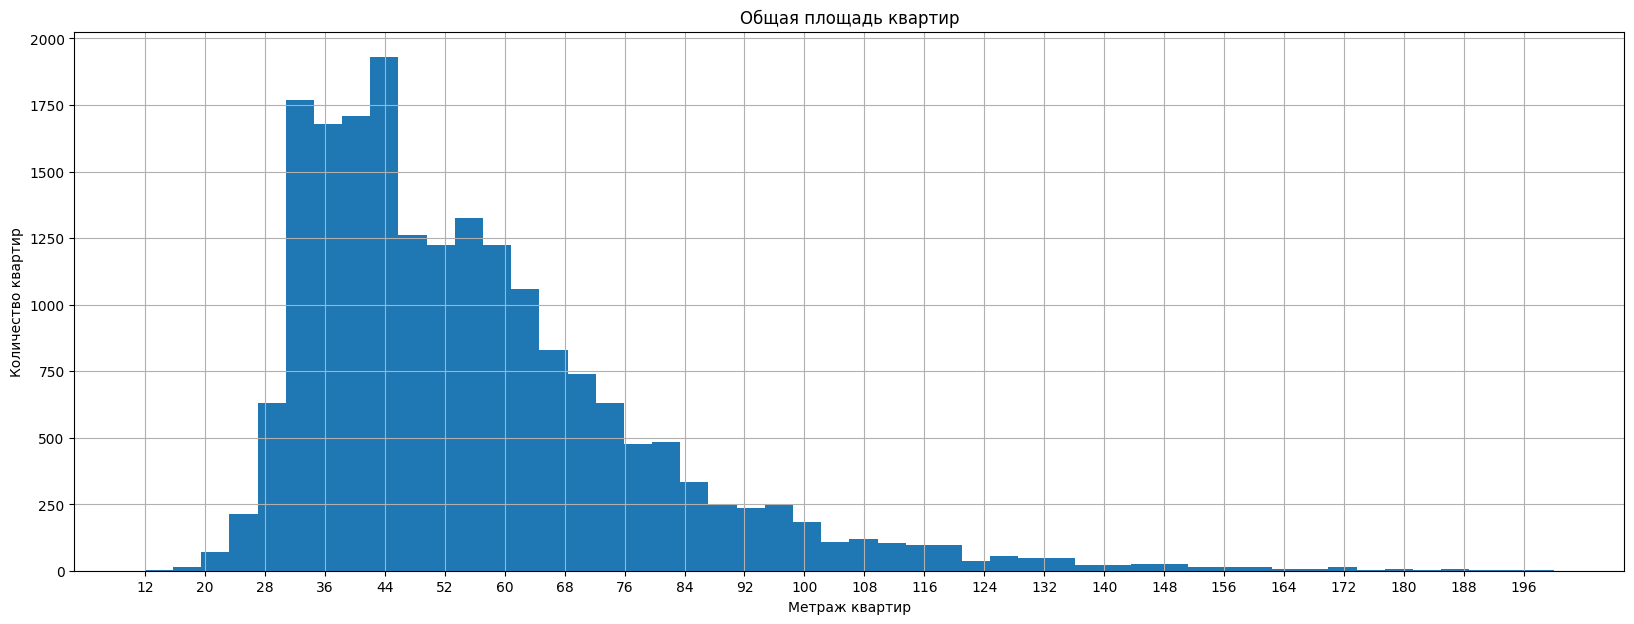

In [119]:
data['total_area'].hist(bins=50, figsize=(20,7)) 
plt.xticks(np.arange(12,200,8))
plt.title('Общая площадь квартир')
plt.xlabel('Метраж квартир')
plt.ylabel('Количество квартир')
plt.show();

**На графике представлены общие площади квартир (от 12 кв.м. для студий и до 200 кв.м. для элитного жилья).
Пик гистограммы приходится на квартиры с площадью около 45 кв.м. Также большое число квартир продаётся с метражём от 32 до 45 кв.м. Спад начинается с квартир площадью ~60 кв.м.**

**2. Жилая площадь.**

In [120]:
data['living_area'].describe()

count   19420.00
mean       32.17
std        15.00
min        10.00
25%        18.90
50%        30.00
75%        41.00
max       100.00
Name: living_area, dtype: float64

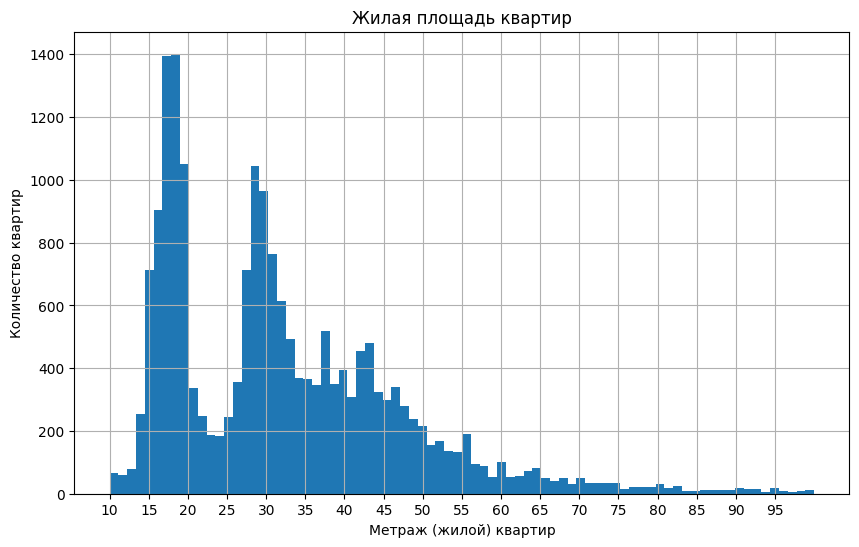

In [121]:
data['living_area'].hist(bins=80, figsize=(10,6))
plt.xticks(np.arange(10,100,5))
plt.title('Жилая площадь квартир')
plt.xlabel('Метраж (жилой) квартир')
plt.ylabel('Количество квартир')
plt.show();

**На графике представлены жилые площади квартир (от 10 метров для студий до 100 метров для элитного жилья. Можно заметить 2 пика - основой пик приходится на квартиры с жилой площадью около 17-18 кв.метров, второй пик (меньший) приходится на квартиры с площадью около 30 кв.метров.** 
    
**При расчётах мы исходили из того, что жилая площадь = около 60% от общей площади.**

**Т.е., первому пику c жилой площадью 17-18 кв.м. соответсвует общая площадь ~ 28-30 кв.м. (близко ко второму пику (32 кв.м) на гистограмме с общей площадью).**
    
**Второму пику с жилой площадью 30 кв.м. соответсвует общая площадь ~ 50-53 кв.м. (не попадает в пик 45 кв.м. на гистограмме с общей площадью).**
    
**Не понятно наличие двух пиков на графике. Возможно это связано с неправильным заполнением пользователями данных о жилой площади. Возможно, играют роль особенности планировок/наличие типовых проектов квартир, и за счёт этого сформировалась такая гистограмма.**

**3. Площадь кухни.**

In [122]:
data['kitchen_area'].describe()

count   19420.00
mean       10.03
std         4.77
min         1.30
25%         7.00
50%         9.00
75%        11.44
max        65.00
Name: kitchen_area, dtype: float64

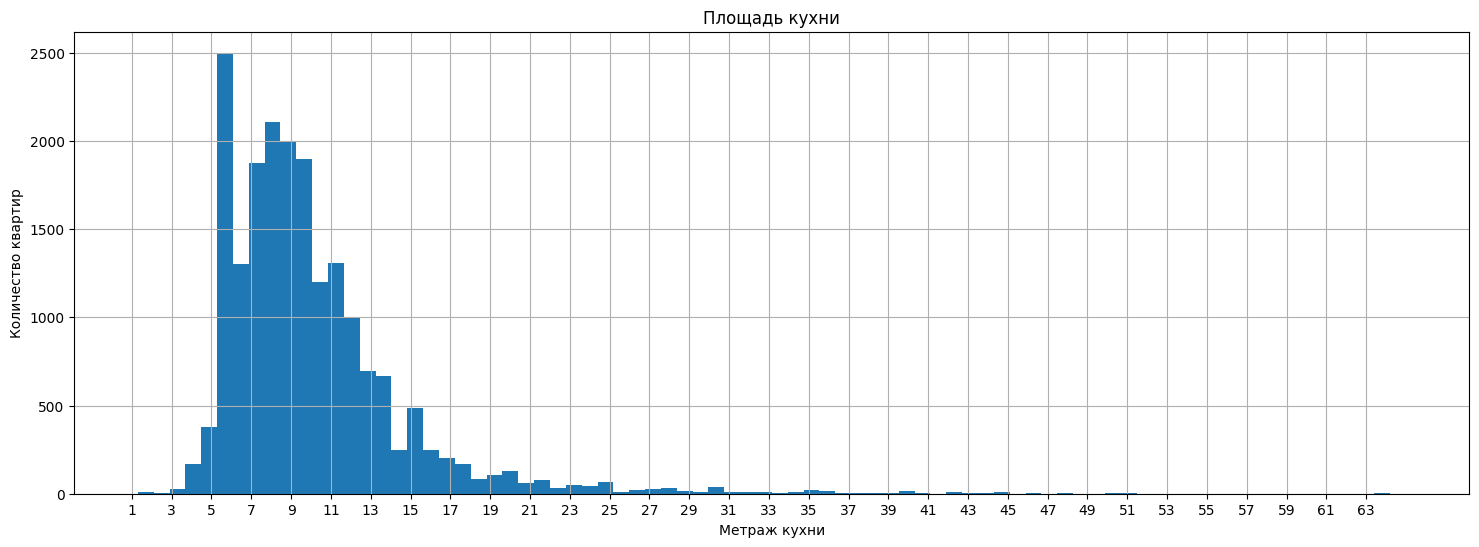

In [123]:
data['kitchen_area'].hist(bins=80, figsize=(18,6))
plt.xticks(np.arange(1,65,2))
plt.title('Площадь кухни')
plt.xlabel('Метраж кухни')
plt.ylabel('Количество квартир')
plt.show();

**На графике представлены площади кухни (от 1.3 метра для студий до 65 метров для элитного жилья). Первый пик приходится на кухни с площадью 6 кв.м. Далее идёт распределение пика на кухнях с площадью от 7 до 10 кв.м.**
    
**Необычное увеличение данных в значении 6 кв.м., вероятно связано, с преобразованием данных, когда задавалось условие для значений, где определённо были сомнения в правильности указания в объявлениях площади кухни. С другой стороны, были скорректированы не такие большие объёмы данных, чтобы на столько повлиять на график. Стоит отметить, что на вторичном рынке для жилья советской постройки распостранённая типовая кухня - 6 кв.м. Вероятно, в точке 6 кв.м. отражены как раз эти объекты недвижимости, а пик с 7 до 10 кв.м. показывает жильё, построенное после 90-х годов, когда появились новые планировки квартир.**
    
**Можно попробовать сопоставить данную гистограмму с гистограммой общей площади. Мы принимали в расчётах, что кухня занимает около 17% всей общей площади.**
    
**В таком случае, кухне с 6 кв.м. должна соответствовать общей площади ~ 35 кв.м. (хотя, если смотреть, например, хрущёвки на вторичном жилье, то площадь кухни 6 метров соответсвует ~ 42 кв.м. общей площади). Для сравнения: первый пик на гистограмме общей площади приходится на 45 кв.м., второй на диапазон 32-45 кв.м.**
    
**Кухне с площадью от 7 до 10 кв.м. должна соответствовать общая площадь ~ от 41 до 58 кв.м.**

**Для сравнения: спад на гистрограмме общей площади начинается с площади 60 кв.м.**

**4. Цена объекта.**

In [124]:
data['last_price'].describe()

count      19420.00
mean     5522128.99
std      3681447.37
min       430000.00
25%      3400000.00
50%      4547000.00
75%      6500000.00
max     30000000.00
Name: last_price, dtype: float64

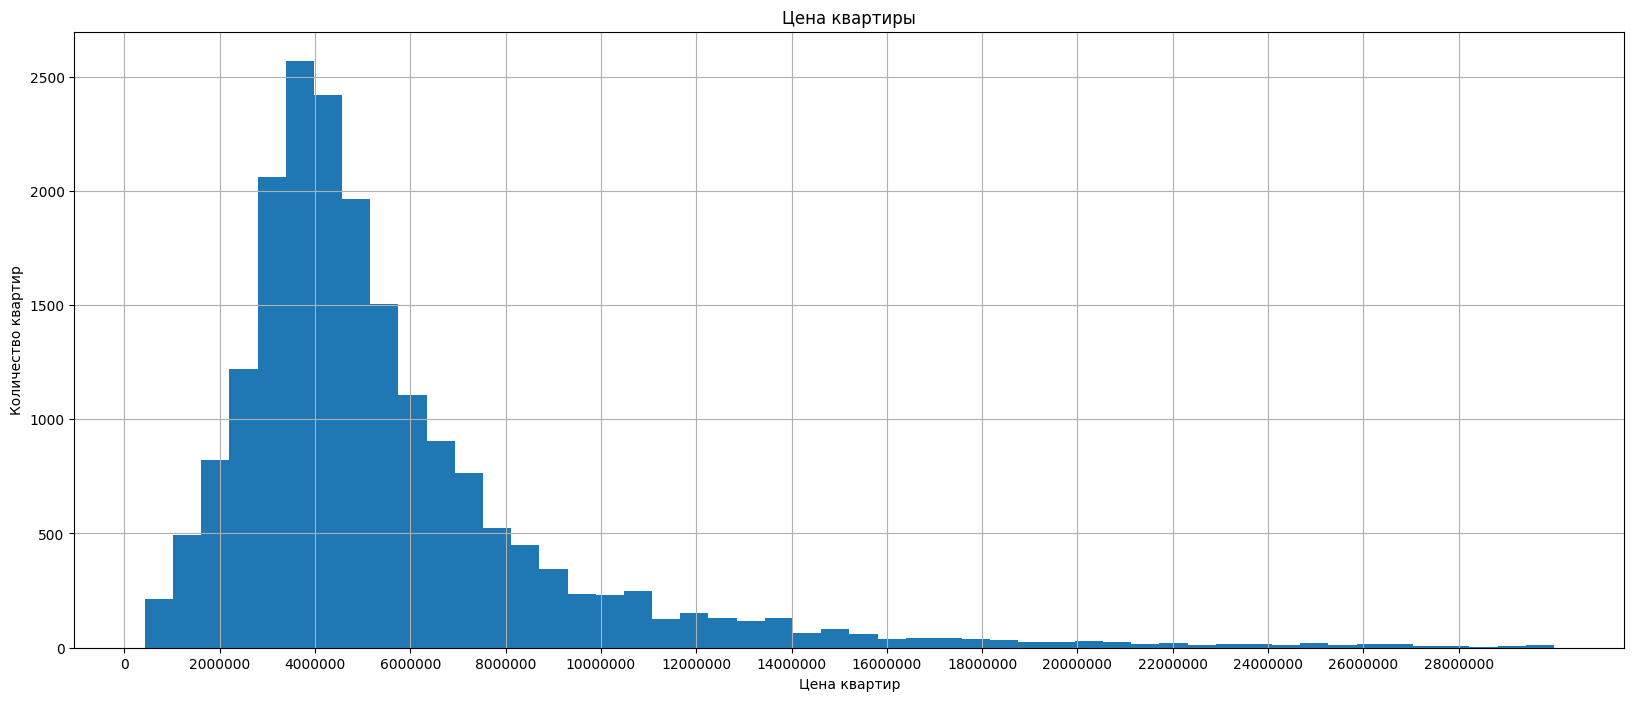

In [125]:
data['last_price'].hist(bins=50, figsize=(20,8))
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(np.arange(0,30000000,2000000))
plt.title('Цена квартиры')
plt.xlabel('Цена квартир')
plt.ylabel('Количество квартир')
plt.show();

**Пик в столбце last_price приходится на 3,8-4,2 млн.рублей. С 5 млн.рублей начинается спад цены.**

**5. Количество комнат.**

In [126]:
data['rooms'].describe()

count   19420.00
mean        1.98
std         0.93
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         5.00
Name: rooms, dtype: float64

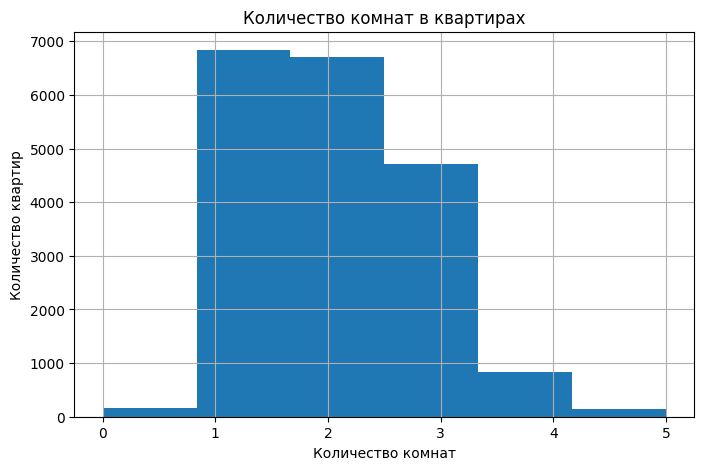

In [127]:
data['rooms'].hist(bins=6, figsize=(8,5))
plt.title('Количество комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show();

**Основное количество комнат составляет 1 и 2 комнаты. Далее следуют квартиры с 3 комнатами. Далее - с 4-мя комнатами. Меньше всего квартир с 0 комнатами (т.е. студии) и с 5 комнатами.**

**6. Высота потолков.**

In [128]:
data['ceiling_height'].describe()

count   19420.00
mean        2.62
std         0.22
min         2.30
25%         2.50
50%         2.50
75%         2.70
max         4.80
Name: ceiling_height, dtype: float64

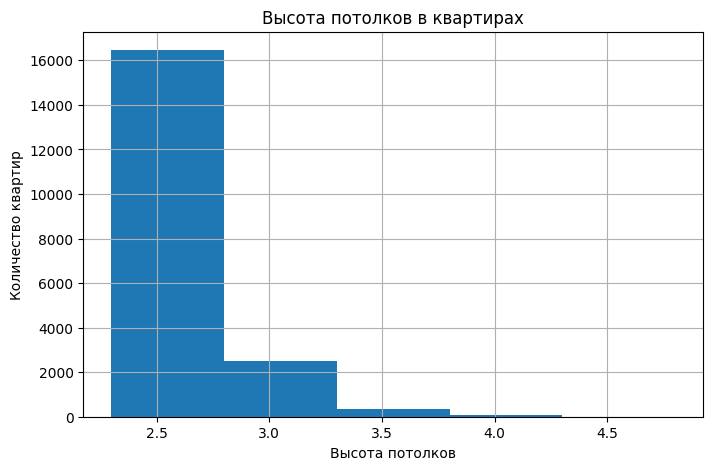

In [129]:
data['ceiling_height'].hist(bins=5, figsize=(8,5))
plt.title('Высота потолков в квартирах')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show();

**Наибольшая высота потолка составляет 2,5 метра. Вобщем-то, результаты гистограммы соответствуют действительности. Наибольшая доля приходится на потолки высотой 2,5 - 2,7 м, для элитного жилья высота потолков соответствует 3 м и выше.**

**7. Этаж квартиры.**

In [130]:
data['floor'].describe()

count   19420.00
mean        5.94
std         4.91
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

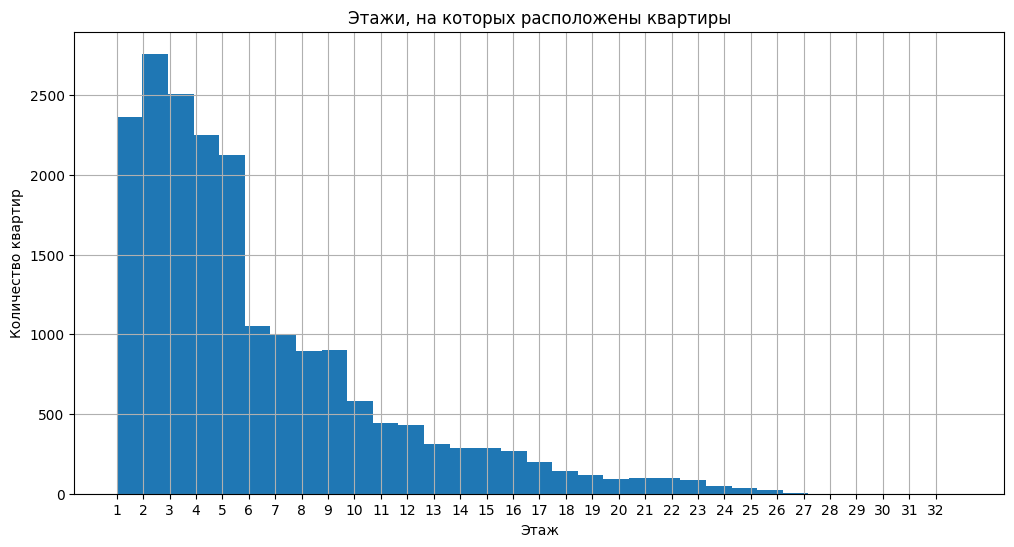

In [131]:
data['floor'].hist(bins=33, figsize=(12,6))
plt.xticks(np.arange(1,33,1))
plt.title('Этажи, на которых расположены квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show();

**Основная доля недвижимости расположена на этажах с 1 по 5 этаж. Максимальное количество объектов из представленых расположено на 2 этаже.**

**8. Тип этажа квартиры («первый», «последний», «другой»)**

In [132]:
data['floor_types'].describe()

count      19420
unique         3
top       другой
freq       14376
Name: floor_types, dtype: object

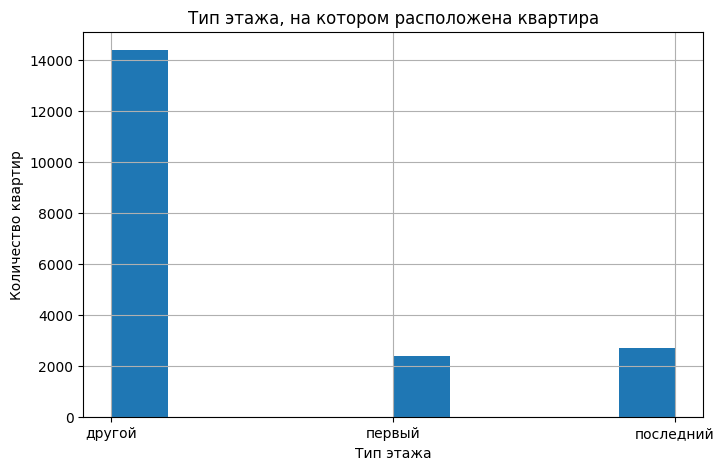

In [133]:
data['floor_types'].hist(figsize=(8,5))
plt.title('Тип этажа, на котором расположена квартира')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show();

**Основое количество объектов недвижимости расположены на других этажах. На последнем этаже расположено чуть больше объектов, чем на первом. В совокупности, объекты на первом и последнем этажах составляют примерно третью часть от других объектов.**

**9. Общее количество этажей в доме.**

In [134]:
data['floors_total'].describe()

count   19420.00
mean       10.82
std         6.62
min         2.00
25%         5.00
50%         9.00
75%        16.00
max        37.00
Name: floors_total, dtype: float64

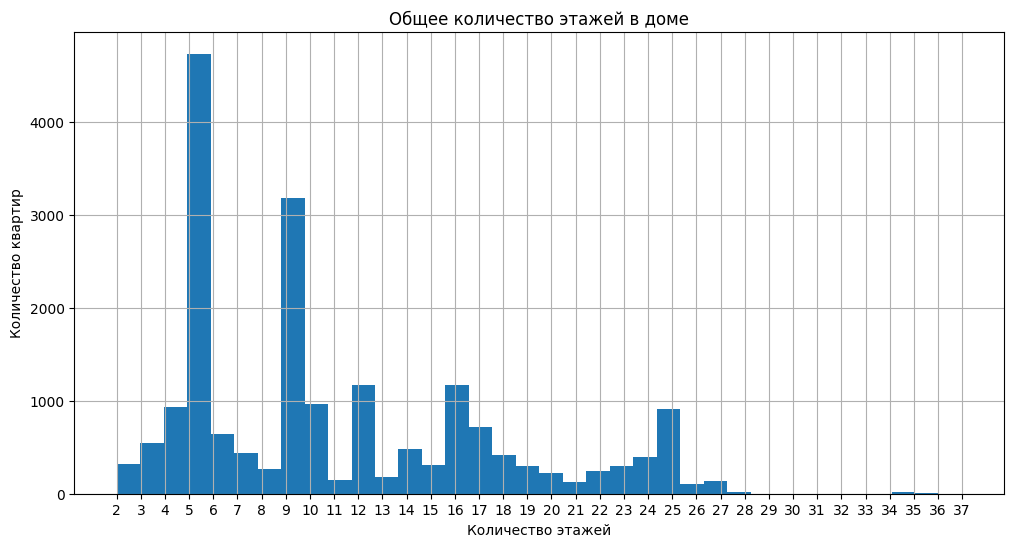

In [135]:
data['floors_total'].hist(bins=36, figsize=(12,6))
plt.xticks(np.arange(2,38,1))
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show();

**Основное количество объектов недвижимости расположены в 5-ти этажных домах. Если это дома советской постройки на вторичном рынке, то в таком случае, верно предположение про гистограмму для кухни (про пик в 6 кв.м.) Также много 9-ти этажных домов. Выделяются из общей массы объектов дома с 3 этажами, 10, 12, 16 и 25 этажами.**

**10. Расстояние до центра города в метрах.**

In [136]:
data['cityCenters_nearest'].describe()

count   19420.00
mean    14258.09
std      7409.28
min       208.00
25%     11413.00
50%     13218.00
75%     15402.00
max     65952.00
Name: cityCenters_nearest, dtype: float64

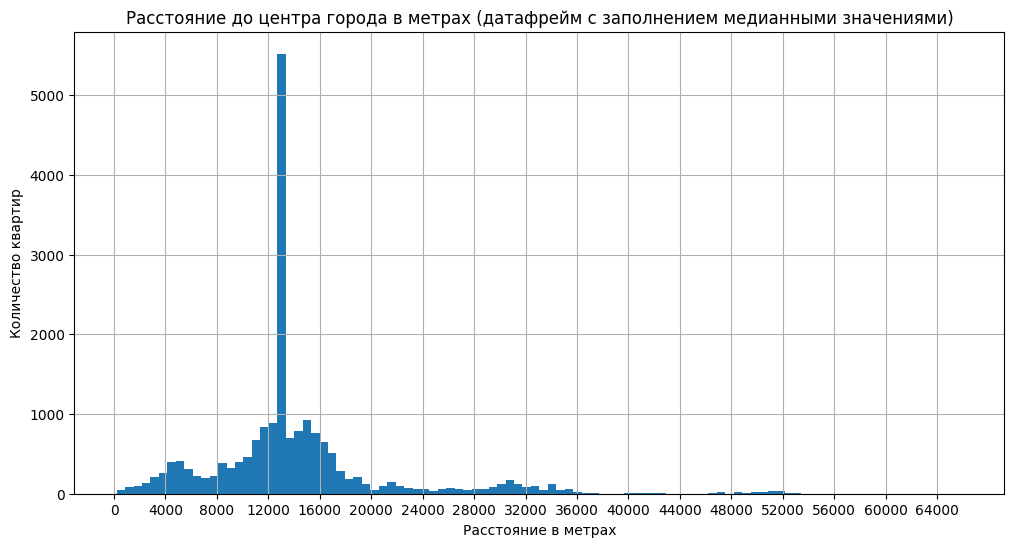

In [137]:
data['cityCenters_nearest'].hist(bins=100, figsize=(12,6))
plt.xticks(np.arange(0,65952,4000))
plt.title('Расстояние до центра города в метрах (датафрейм с заполнением медианными значениями)')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show();

In [138]:
data_copy['cityCenters_nearest'].describe()

count   17641.00
mean    14365.55
std      8575.09
min       208.00
25%      9568.00
50%     13218.00
75%     16361.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

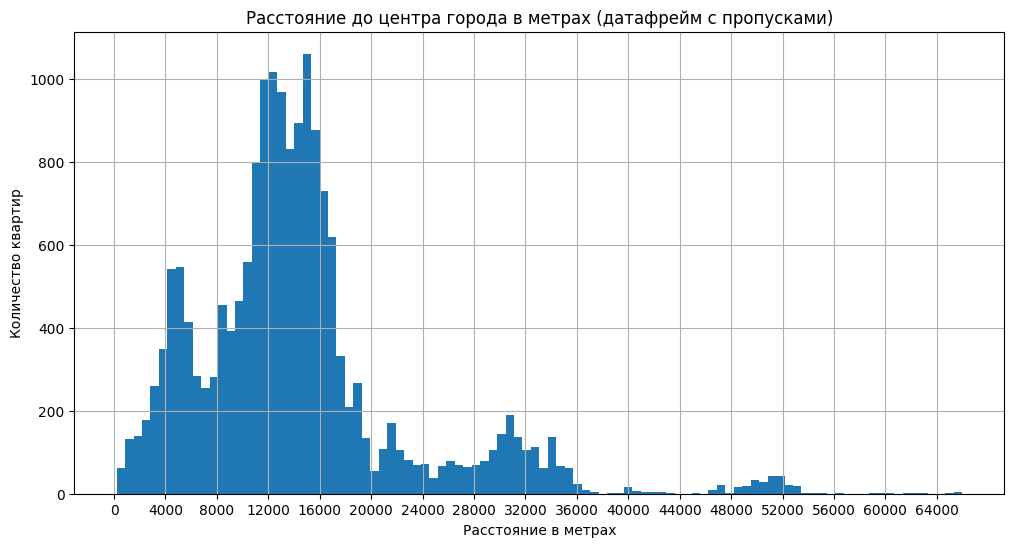

In [139]:
data_copy['cityCenters_nearest'].hist(bins=100, figsize=(12,6))
plt.xticks(np.arange(0,65968,4000))
plt.title('Расстояние до центра города в метрах (датафрейм с пропусками)')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show();

**По информации из [википедии](https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D1%81%D0%BA%D0%B0%D1%8F_%D0%B0%D0%B3%D0%BB%D0%BE%D0%BC%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F) Санкт-Петерургская агломерация - моноцентрическая городская агломерация, сформировавшаяся вокруг Санкт-Петербурга. К ней относят всю территорию города федерального значения Санкт-Петербурга и часть территории Ленинградской области. Агломерация простирается примерно на 50 км от центра Санкт-Петербурга.**

**Агломерация включает в себя:**
- ***ядро агломерации*** *(зона сплошной жилой застройки Санкт-Петербурга, 13 из 18 его районов. Это Адмиралтейский, Василеостровский, Выборгский (без Левашово и Парголово), Калининский, Кировский, Красногвардейский, Красносельский (без Горелово и Красного Села), Московский (без Авиагородка и Пулково), Невский, Петроградский, Приморский (без Лахты-Ольгино и Лисьего Носа), Фрунзенский, Центральный районы.; население около 5 млн человек),*
    
- ***первый пояс поселений-спутников***  *(берёт начало от 5 пригородных районов Петербурга - Колпинский, Кронштадтский, Курортный, Петродворцовый, Пушкинский, и частей других районов города, не относящихся к сплошной застройке. Также к нему относятся территории Ленинградской области, граничащие с Петербургом. Население 1 млн человек),*
    
- ***второй пояс поселений-спутников*** *(полностью относится к Ленинградской области, население 0,5 млн человек).*
    
[Карта районов Санкт-Петербурга](https://yandex.ru/maps/?from=mapframe&ll=30.267391%2C59.962811&mode=usermaps&rl=30.275631%2C59.829648~0.032959%2C0.110432&source=mapframe&um=constructor%3A_HQWNUDMcovgeVHjXKFedUc2QdgIOtyE&utm_source=mapframe&z=9)
 

    
**Первая гистограмма (с пропусками, заполненными медианными значениями) показывает, что основная масса объектов недвижимости расположена в 13 км от центра Санкт-Петербурга. Это, по-сути, выброс, вызванный обработкой пропусков, необходимый для расчёта расстояния до центра города в км. Гистограмма, построенная для датафрейма без указанной обработки пропусков, показывает, что наибольшее число объектов недвижимости располагаются на расстоянии 11-16 км от центра Санкт-Петербурга. Насколько можно сделать вывод по карте районов Санкт-Петербурга, эти объекты недвижимости располагаются в районах, которые относятся к первому поясу поселений-спутников, либо в ядре агломерации (ближе к первому поясу поселений).**

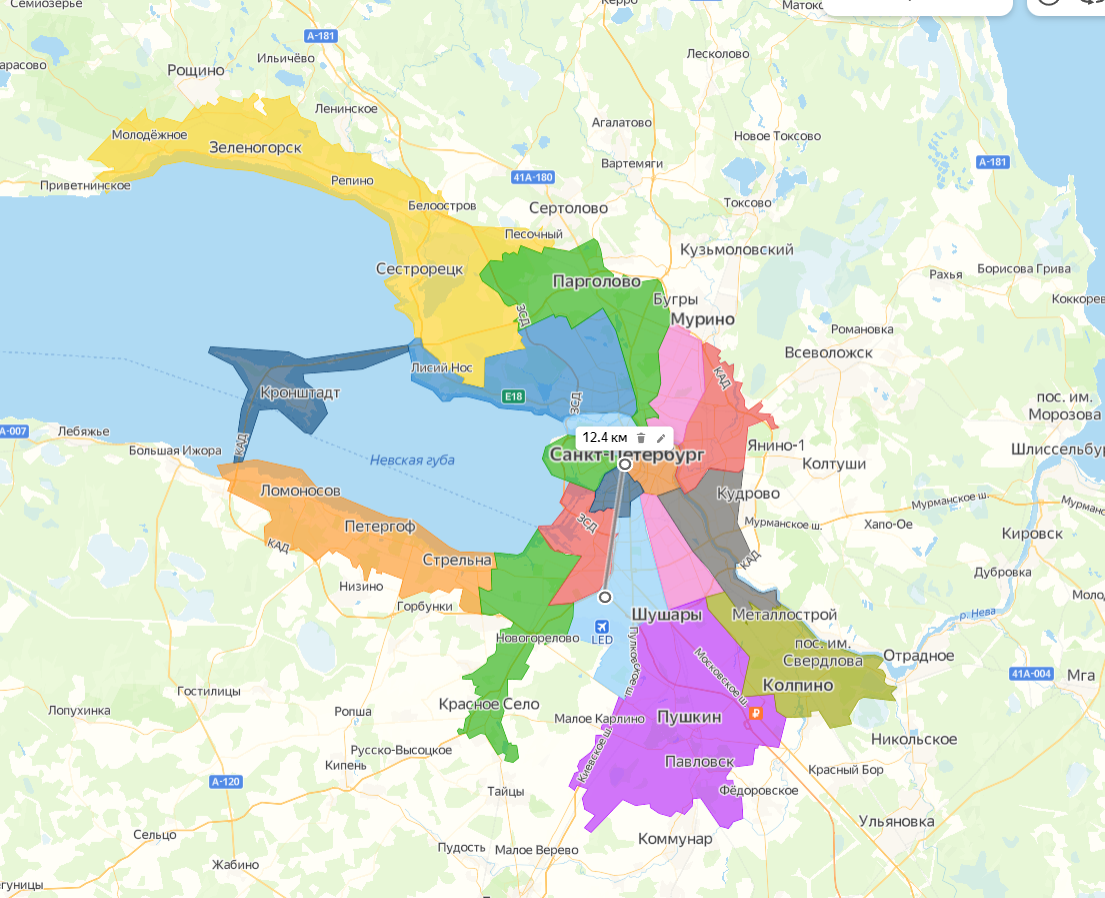

**11. Расстояние до ближайшего аэропорта.**

In [140]:
data['airports_nearest'].describe()

count   14711.00
mean    28947.70
std     12840.64
min         0.00
25%     18321.00
50%     27148.00
75%     37491.00
max     84853.00
Name: airports_nearest, dtype: float64

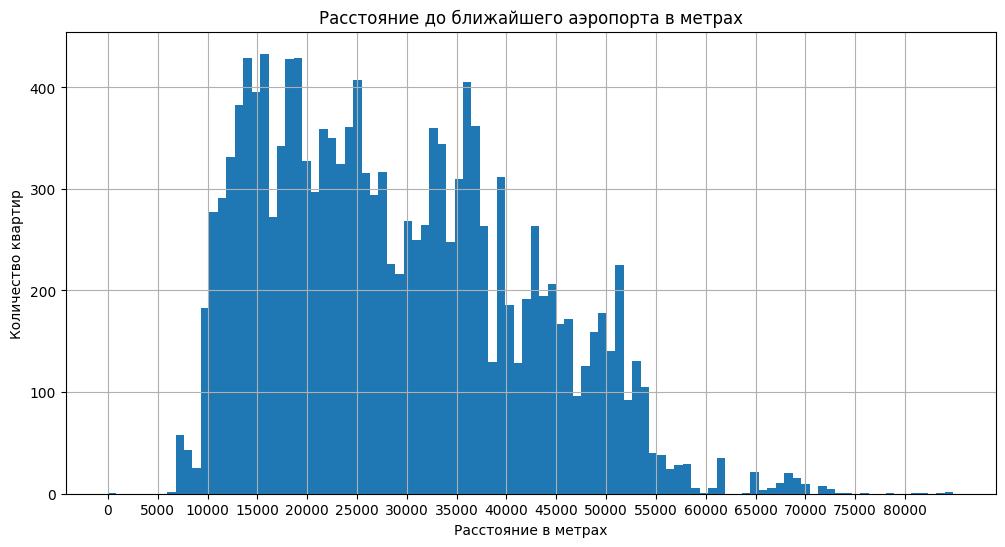

In [141]:
data['airports_nearest'].hist(bins=100, figsize=(12,6))
plt.xticks(np.arange(0,84853,5000))
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show();

**Большинство объектов расположены на расстоянии от ~ 14 до 25 км от аэропорта, также много объектов недвижимости, расположенных на расстоянии ~ 33 и 36 км.от аэропорта.**

**12. Расстояние до ближайшего парка.**

In [142]:
data['parks_nearest'].describe()

count   6355.00
mean     494.06
std      339.48
min        1.00
25%      290.00
50%      458.00
75%      616.00
max     3190.00
Name: parks_nearest, dtype: float64

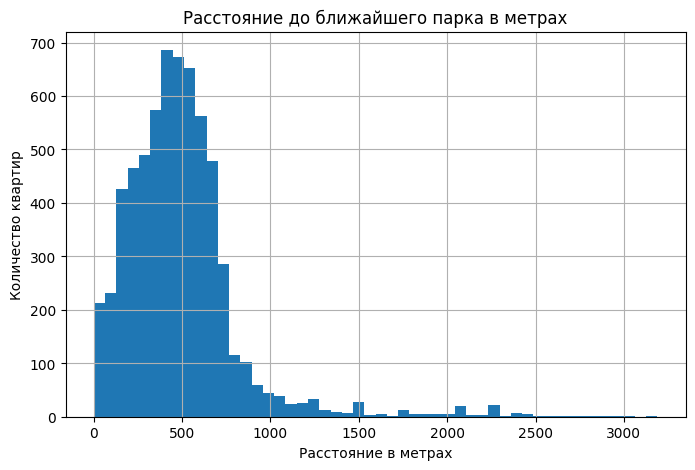

In [143]:
data['parks_nearest'].hist(bins=50, figsize=(8,5))
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show();

**Гистограмма показывает, что наибольшее количество объектов находится на расстоянии 400-600 м от ближайшего парка.**

**13. День и месяц публикации объявления.**

In [144]:
data[['weekday', 'month']].describe()

,weekday,month
count,19420.00,19420.00
mean,2.57,6.37
std,1.79,3.49
min,0.00,1.00
25%,1.00,3.00
50%,3.00,6.00
75%,4.00,10.00
max,6.00,12.00


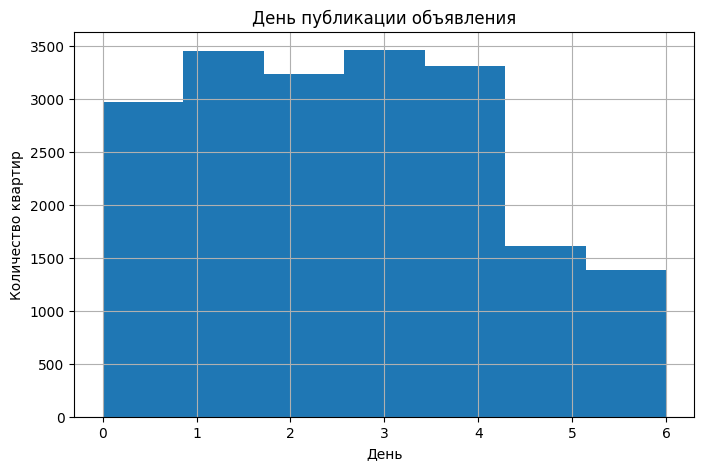

In [145]:
data['weekday'].hist(bins=7, figsize=(8,5))
plt.title('День публикации объявления')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show();

**Большинство объявления публиковалось по будням.**

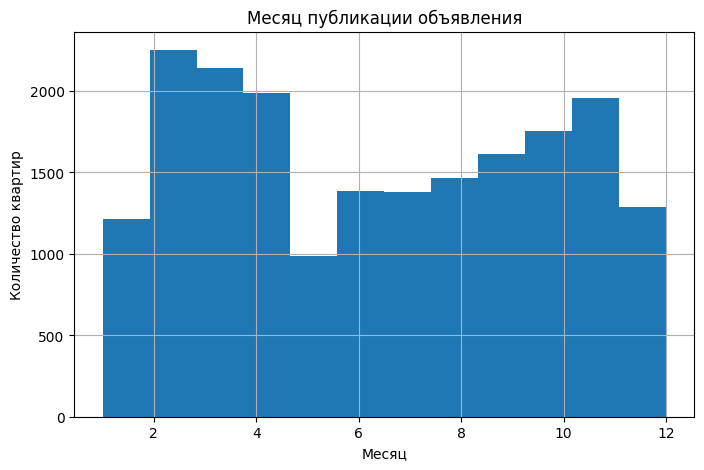

In [146]:
data['month'].hist(bins=12, figsize=(8,5))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show();

**Большинство объявлений о продаже квартир публиковались в феврале, марте, с апреля начинался спад. Далее, с сентября по ноябрь происходит увеличение частоты размещения объяслений, в декабре опять спад.**

**14. Скорость продажи квартиры.**

In [147]:
data['days_exposition'].describe()

count   19420.00
mean      100.28
std        83.28
min         7.00
25%        45.00
50%        60.00
75%       137.00
max       364.00
Name: days_exposition, dtype: float64

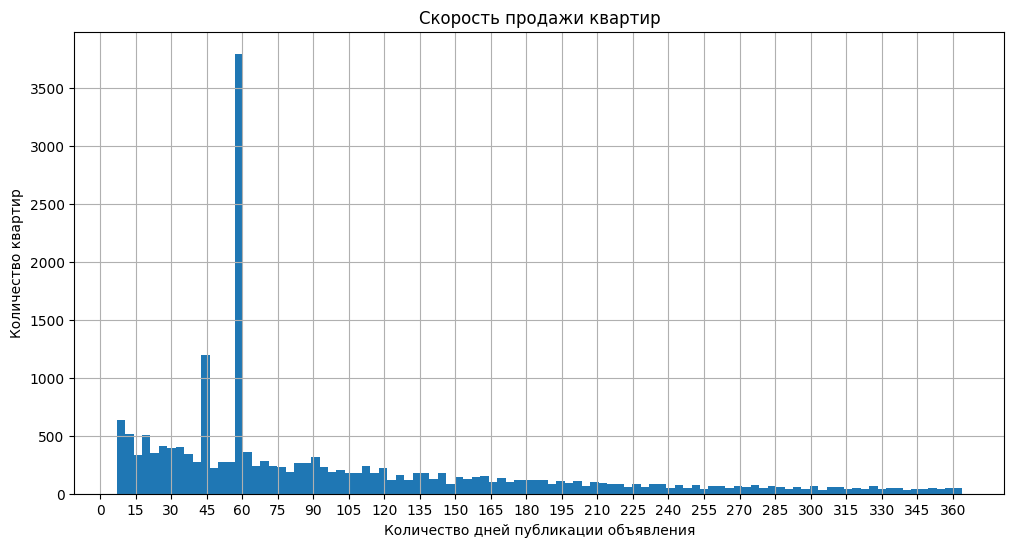

In [148]:
data['days_exposition'].hist(bins=100, figsize=(12,6))
plt.xticks(np.arange(0,365,15))
plt.title('Скорость продажи квартир')
plt.xlabel('Количество дней публикации объявления')
plt.ylabel('Количество квартир')
plt.show();

**Гистограмма показывает, что подавляющее число объектов недвижимости продавалось за 2 месяца. Также много объектов недвижимости продавалось за 45 дней. Продажи в течении 2ой недели немного повыше по сравнению с другими равномерными значениями. Т.е., основную часть недвижимости удаётся реализовать в краткосрочной перспективе - 60 дней. Быстрой продажей можно считать реализацию недвижимости в срок 45 дней.**
    
**Медианное значение 60 дней, среднее арифметическое 100 дней. Таким образом, медианное значение отражает реальное положение дел, в то время как среднее арифметическое завышает результаты почти на треть.**

**Слишком долгий срок *(более 137 дней)* размещения объявления, вероятнее всего, объясняется ценой продажи выше рынка, либо неликвидным объектом.**

## Определение факторов, наиболее влияющих на цену (total_area, living_area, kitchen_area, rooms, floor_types, weekday, month, year.

**1. TOTAL AREA**

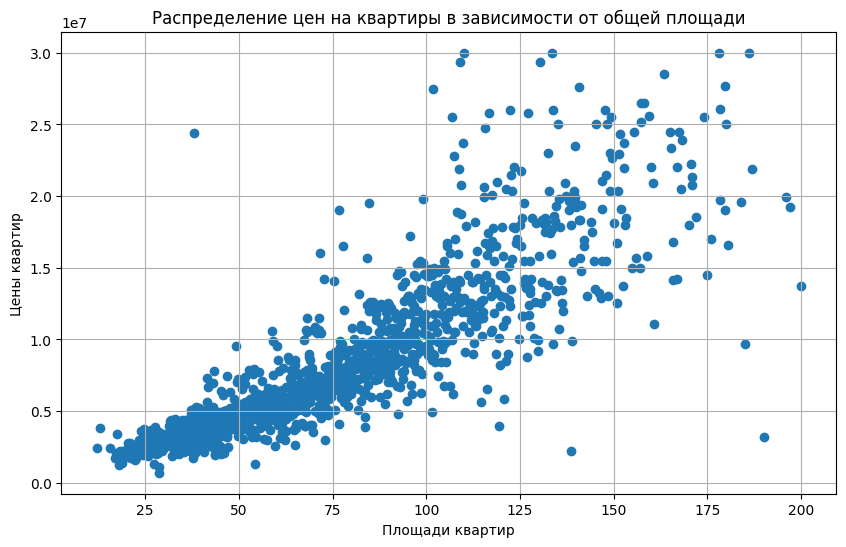

In [149]:
plt.figure(figsize=(10,6))
plt.scatter('total_area', 'last_price', data= \
            data.pivot_table(index='total_area', values ='last_price', aggfunc='median').reset_index())
plt.title('Распределение цен на квартиры в зависимости от общей площади')
plt.ylabel('Цены квартир')
plt.xlabel('Площади квартир')
plt.grid()
plt.show()

In [150]:
data['last_price'].corr(data['total_area'])

0.7706137615258931

**Между ценой жилья и общей площадью имеется прямая зависимость, коэффициент корреляции достаточно высокий, и составляет 0.77. Наиболее чётко зависимость прослеживается для жилья площадью до 75 кв., далее значения начинают постепенно рассеиваться на графике. Для жилья, площадью свыше 125 кв.м., по-сути, нет сильной зависимости цены от общей площади.**

**2. LIVING AREA**

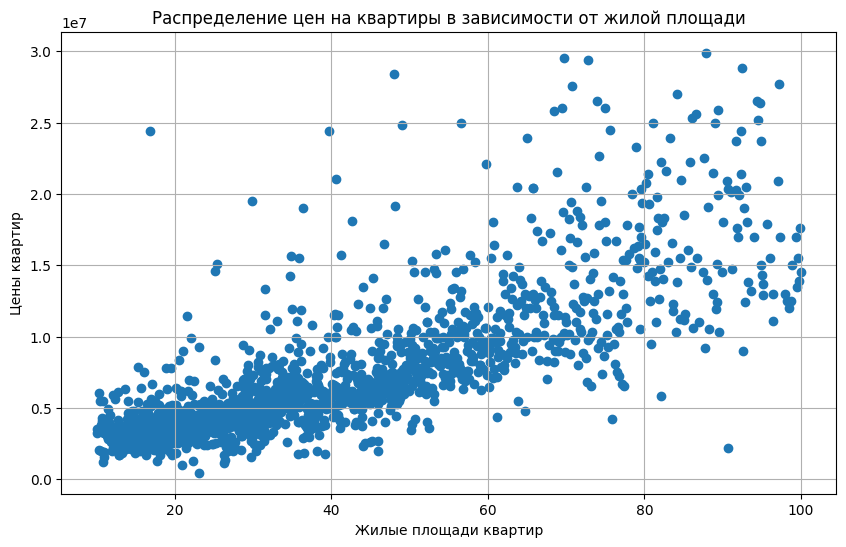

In [151]:
plt.figure(figsize=(10,6))
plt.scatter('living_area', 'last_price', data= \
            data.pivot_table(index='living_area', values ='last_price', aggfunc='median').reset_index())
plt.title('Распределение цен на квартиры в зависимости от жилой площади')
plt.xlabel('Жилые площади квартир')
plt.ylabel('Цены квартир')
plt.grid()
plt.show()

In [152]:
data['last_price'].corr(data['living_area'])

0.6528240058440786

**Между ценой жилья и жилой площадью имеется прямая зависимость, коэффициент корреляции достаточно высокий, и составляет 0.66, однако он ниже, чем коэффициент корреляции у общей площади (0,77). Наиболее чётко зависимость прослеживается для жилья с жилой площадью до 50 кв., далее значения начинают постепенно рассеиваться на графике. Для жилья, с жилой площадью свыше 70 кв.м., по-сути, нет сильной зависимости цены от общей площади.**

**3. KITCHEN AREA**

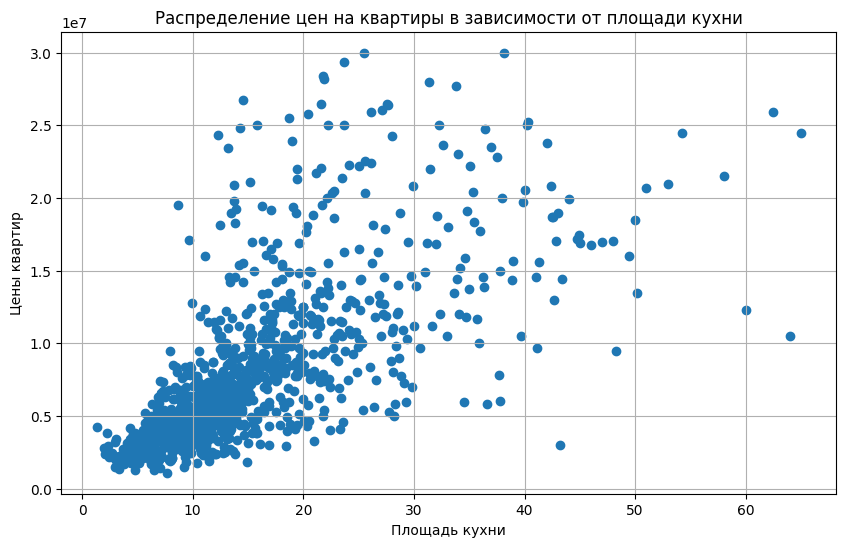

In [153]:
plt.figure(figsize=(10,6))
plt.scatter('kitchen_area', 'last_price', data= \
            data.pivot_table(index='kitchen_area', values ='last_price', aggfunc='median').reset_index())
plt.title('Распределение цен на квартиры в зависимости от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цены квартир')
plt.grid()
plt.show()

In [154]:
data['last_price'].corr(data['kitchen_area'])

0.6078142804342627

**Между ценой жилья и площадью кухни имеется прямая зависимость, коэффициент корреляции достаточно высокий, и составляет 0.61, чуть ниже, чем коэффициент корреляции у жилой площади (0,66). Наиболее чётко зависимость прослеживается для жилья с площадью кухни до 15 кв., далее значения начинают постепенно рассеиваться на графике. Для жилья, с площадью кухни свыше 20 кв.м., по-сути, нет сильной зависимости цены от общей площади.**

**4. ROOMS**

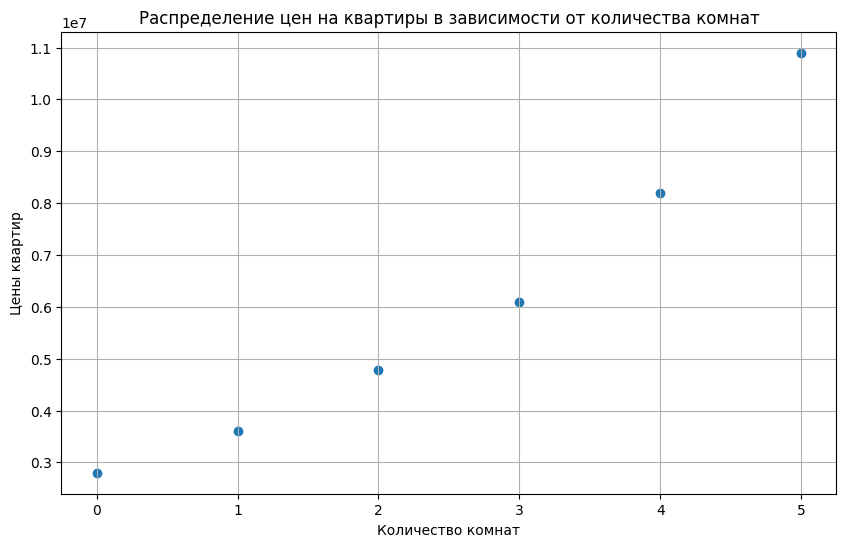

In [155]:
plt.figure(figsize=(10,6))
plt.scatter('rooms', 'last_price', data= \
            data.pivot_table(index='rooms', values ='last_price', aggfunc='median').reset_index())
plt.title('Распределение цен на квартиры в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цены квартир')
plt.grid()
plt.show()

In [156]:
data['last_price'].corr(data['rooms'])

0.45897266945558385

**Между количеством комнат и ценой жилья имеется прямая зависимость. Коэффициент корреляции составляет 0.47, однако, график визуально формирует точками линию, стремящуся равномерно вверх.**

**5. FLOOR TYPES**

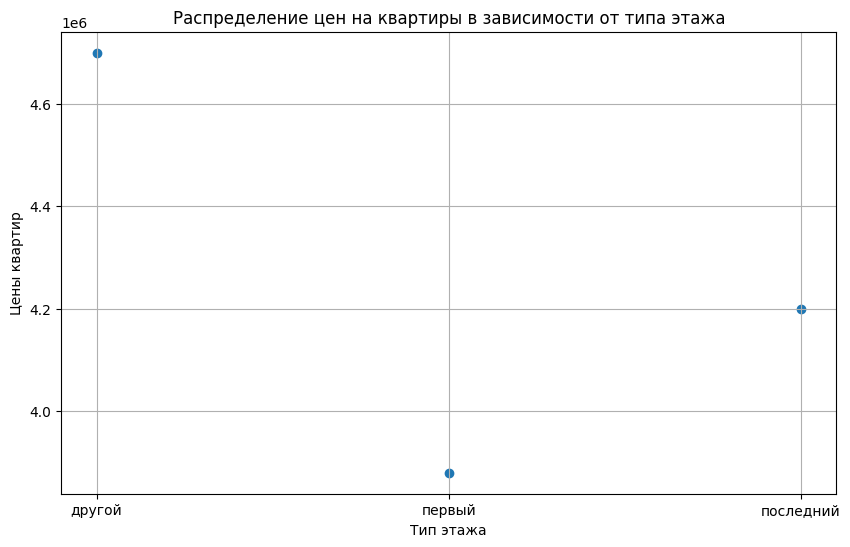

In [157]:
plt.figure(figsize=(10,6))
plt.scatter('floor_types', 'last_price', data= \
            data.pivot_table(index='floor_types', values ='last_price', aggfunc='median').reset_index())
plt.title('Распределение цен на квартиры в зависимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цены квартир')
plt.grid()
plt.show()

In [158]:
data['last_price'].corr(data['floor'])

0.0992493881460063

**Между высотой этажа и ценой жилья нет прямой зависимости. Коэффициент корреляции нельзя рассчитать для floor_types, однако, если посчитать коэффициент корреляции для floor, то он будет стремиться к нулю.**

**6. WEEKDAY**

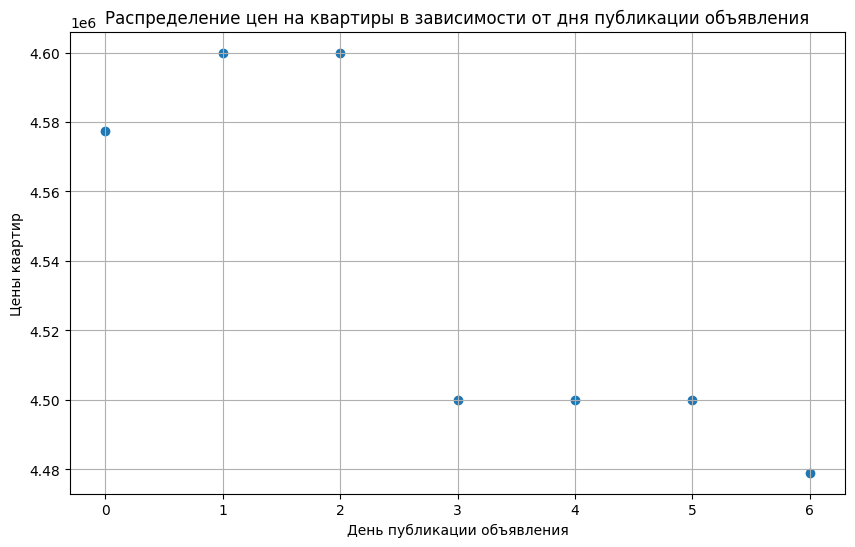

In [159]:
plt.figure(figsize=(10,6))
plt.scatter('weekday', 'last_price', data= \
           data.pivot_table(index='weekday', values ='last_price', aggfunc='median').reset_index())
plt.title('Распределение цен на квартиры в зависимости от дня публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Цены квартир')
plt.grid()
plt.show()

In [160]:
data['last_price'].corr(data['weekday'])

-0.01574424561435747

**Между днём публикации объявления и ценой жилья нет зависимости. Коэффициент корреляции отрицательный, стремящийся к нулю.**

**7. MONTH**

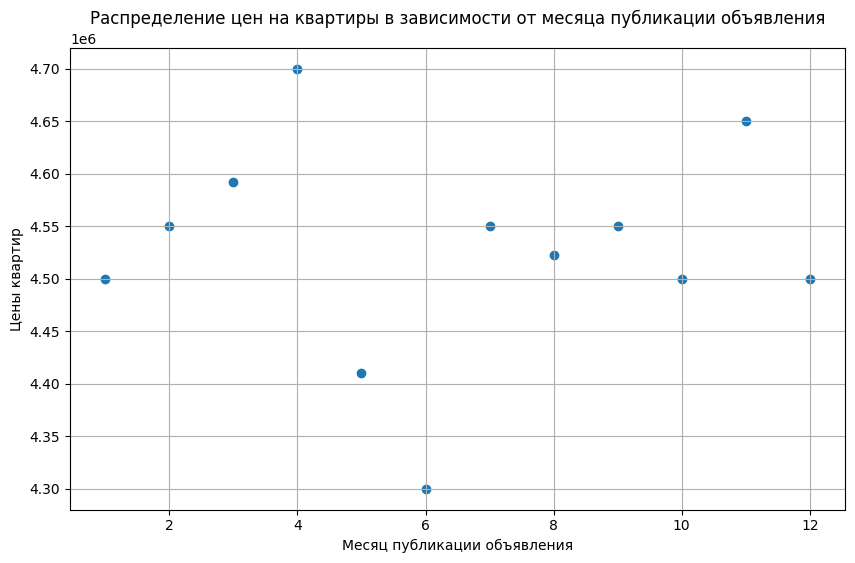

In [161]:
plt.figure(figsize=(10,6))
plt.scatter('month', 'last_price', data= \
           data.pivot_table(index='month', values ='last_price', aggfunc='median').reset_index())
plt.title('Распределение цен на квартиры в зависимости от месяца публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Цены квартир')
plt.grid()
plt.show()

In [162]:
data['last_price'].corr(data['month'])

-0.0022469424293868113

**Между месяцем публикации объявления и ценой жилья нет зависимости. Коэффициент корреляции стремится к нулю.**

**8. YEAR**

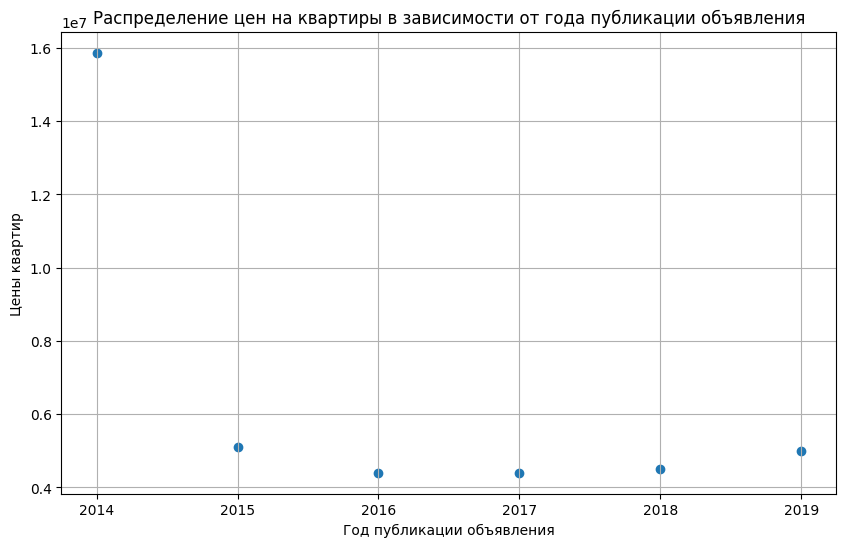

In [163]:
plt.figure(figsize=(10,6))
plt.scatter('year', 'last_price', data= \
           data.pivot_table(index='year', values ='last_price', aggfunc='median').reset_index())
plt.title('Распределение цен на квартиры в зависимости от года публикации объявления')
plt.xlabel('Год публикации объявления')
plt.ylabel('Цены квартир')
plt.grid()
plt.show()

In [164]:
data['last_price'].corr(data['year'])

0.008715672403446884

**Между годом публикации объявления и ценой жилья нет зависимости. Коэффициент корреляции стремится к нулю.**

**ВЫВОД для раздела об определении факторов, наиболее влияющих на цену:  наибольшую прямую зависимость цена жилья имеет от общей площади (соотвенно, поэтому имеется и прямая зависимость с жилой площадью и площадью кухни, ведь эти параментры в свою очередь сами зависят от общей площади). Также на цену жилья влияет количество комнат.**

## Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.**

In [165]:
# создание сводной таблицы для поиска 10-ти населённых пунктов с наибольшим числом объявлений
data_sorted_loc_name = data.groupby('locality_name').agg({'locality_name':'count', 'price_metre' : 'median'})
data_sorted_loc_name.columns = ['count_ads', 'price_metre']

In [166]:
# 10 населённых пунктов с наибольшим числом объявлений
data_sorted_loc_name.sort_values(by='count_ads', ascending=False).head(10)

,count_ads,price_metre
locality_name,,
Санкт-Петербург,12697,104494.38
Мурино,509,86268.87
Кудрово,404,96442.77
Шушары,386,77223.32
Всеволожск,338,65934.48
Пушкин,310,99993.59
Колпино,292,74231.13
Парголово,271,90534.98
Гатчина,249,67924.53


**Населёнными пунктами с самой высокой стоимостью жилья являются:**
    
**Санкт-Петербург, Пушкин, Кудрово.**
    
**Населёнными пунктами с самой низкой стоимостью жилья являются:**
    
**Выборг, Всеволожск, Гатчина.**

## Средняя цена каждого км от центра города для квартир в Санкт-Петербурге.

In [167]:
# Средняя цена каждого км от центра города для квартир в Санкт-Петербурге
data_spb_center = data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_km').agg({'price_metre' : 'median'})
data_spb_center

,price_metre
cityCenters_km,
0,125565.61
1,124852.94
2,117077.19
3,111111.11
4,125374.42
5,121710.53
6,126219.51
7,123581.34
8,112139.88


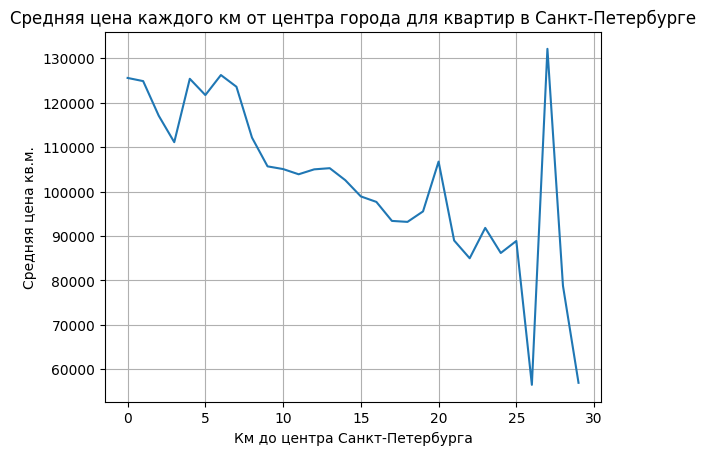

In [168]:
data_spb_center.plot(grid = True, title = 'Средняя цена каждого км от центра города для квартир в Санкт-Петербурге',\
                    legend=None)
plt.xlabel('Км до центра Санкт-Петербурга')
plt.ylabel('Средняя цена кв.м.')
plt.show();

**Как правило, считается, что объекты недвижимости дороже в центре города и дешевле в пригороде. Но нужно также иметь ввиду, что у каждого города имеются свои территориальные особенности, обусловленные историческими факторами, инфраструктурой и т.д. Элитное жильё не всегда может находиться в центре города.**

**В нашем исследовании на первом месте по стоимости одного квадратного метра оказались объекты, находящиеся на расстоянии 27 км от центра города. Если посмотреть на [карту Санкт-Петербурга](https://yandex.ru/maps/2/saint-petersburg/?from=mapframe&ll=30.267391%2C59.962811&mode=usermaps&rl=29.852657%2C59.873865~0.466919%2C0.062080&source=mapframe&um=constructor%3A_HQWNUDMcovgeVHjXKFedUc2QdgIOtyE&utm_source=mapframe&z=9), то можно предположить, что скорее всего, имеется ввиду Петергоф. Далее, по дороговизне одного кв.м. следуют объекты недвижимости в радиусе 10 км от центра города. На 11 месте также встречаются объекты с удалённостью 20 км от центра города - скорее всего, это пригород Петергофа, либо иной дорогостоящий район Санкт-Петербурга (возможно, речь про элитный посёлок Лисий Нос). Далее объекты располагаются, в целом, соотносительно логики "чем дальше от центра - тем дешевле жильё".**

## Итоговый вывод.

**Объектом исследования являлся архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов с конца ноября 2014 года по май 2019 года.**

**После завершения предобработки данных, объём рассматриваемых объектов недвижимости составил - 19488 единицы, из которых 12760 объектов располагаются в г. Санкт-Петербурге (65% от всех данных) и 6728 объектов в пригороде Санкт-Петербурга и Ленинградской области (35% от данных).**

**В ходе исследования выяснилось, что населёнными пунктами с самой высокой стоимостью жилья являются: Санкт-Петербург (104,5 т.р. за 1 кв.м.), Пушкин (100 т.р.), Кудрово (96,4 т.р.).**

**Населёнными пунктами с самой низкой стоимостью жилья являются Выборг (58,4 т.р. за 1 кв.м.), Всеволожск (65,9 т.р.), Гатчина (67,9 т.р.).**
    
**Основное влияние на цену оказывает общая площадь (соотвенно, есть прямая зависимость цены и от жилой площади и площади кухни, т.к. эти параментры в свою очередь сами зависят от общей площади). Также на цену жилья влияет количество комнат.**
    
**По общей площади наибольшее количество объектов приходится на недвижимость от 32 до 45 кв.м. После общей площади 60 кв.м. наблюдается постепенное снижение предложения объектов недвижимости.**
    
**Минимальная цена объекта недвижимости составляет 430 тыс.рублей, максимальная 30 млн.рублей. Большинство объектов недвижимости представлены по цене 3,8-4,2 млн.рублей.**
    
**По количеству комнат основное число приходится на квартиры с 1 и 2 комнатами. Далее следуют квартиры с 3 комнатами, далее - с 4-мя комнатами. Меньше всего квартир с 0 комнатами (т.е. студии) и с 5 комнатами.**
    
**Наибольшая высота потолка составляет 2,5 метра. Основная доля объектов недвижимости представлена с потолками высотой 2,5 - 2,7 м, для элитного жилья высота потолков соответствует 3 м и выше.**
    
**Основная доля недвижимости расположена на этажах с 1 по 5 этаж. Максимальное количество объектов из представленых расположно на 2 этаже.**
    
**Основное количество объектов недвижимости расположены в 5-ти этажных домах (вероятнее всего, это второчное жильё советской постройки). Также много 9-ти этажных домов. Выделяются из общей массы объектов дома с 3 этажами, 10, 12, 16 и 25 этажами.**
    
**По доступности инфраструктуры:**
**- основная масса объектов недвижимости расположена в 13 км от центра г.Санкт-Петербурга,**
**- основная масса объектов расположена на расстояния ~27 км.от аэропорта,**
**- наибольшее число объектов находится на расстоянии 400-500 м от ближайшего парка.**
    
**Как правило, считается, что объекты недвижимости дороже в центре города и дешевле в пригороде. Но нужно также учитывать, что у каждого города имеются свои территориальные особенности, обусловленные историческими факторами, инфраструктурой и т.д. Элитное жильё не всегда может находиться в центре города.**

**В нашем исследовании на первом месте по стоимости одного квадратного метра оказались объекты, находящиеся на расстоянии 27 км от центра города. Если посмотреть на карту Санкт-Петербурга, то можно предположить, что скорее всего, имеется ввиду Петергоф. Далее, по дороговизне одного кв.м. следуют объекты недвижимости в радиусе 10 км от центра города. На 11 месте также встречаются объекты с удалённостью 20 км от центра города - скорее всего, это пригород Петергофа, либо иной дорогостоящий район Санкт-Петербурга (возможно, речь про элитный посёлок Лисий Нос). Далее объекты располагаются, в целом, соотносительно логики "чем дальше от центра - тем дешевле жильё".**
    
    
**Большинство объявлений о продаже квартир публиковались по будням. Пик по активности предложений на рынке недвижимости начинался в феврале-марте, с апреля начинался спад. Далее, с сентября по ноябрь начинался рост частоты размещения объявлений, в декабре опять наблюдался спад.**
    
**Подавляющее число объектов недвижимости продавалось за 2 месяца. Также много объектов недвижимости продавалось за 45 дней. Продажи в течении 1ой недели оказались немного повыше по сравнению с другими равномерными значениями. Т.е., основную часть недвижимости продавцам удаётся реализовать в краткосрочной перспективе - 45 и 60 дней. Слишком долгий срок размещения объявления (доходит до 1 года), по всей видимости, объясняется ценой продажи, установленной выше рынка, либо неликвидным объектом.**